# **AIRBNB INSTANT BOOKABILITY PREDICTION**

This project helps host know if their place can be booked instantly and also manage availability of rooms by getting more bookable

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.0 MB/s eta 0:00:00


#**Importing Libraries**

In [ ]:
# import 'Numpy'
import numpy as np

# import 'Pandas'
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import color package from matplotlib
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# import label encoder,
from sklearn.preprocessing import LabelEncoder

# import stats for performing statistical tests
import scipy.stats as stats

# import train-test split
from sklearn.model_selection import train_test_split

# import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# import StandardScaler
from sklearn.preprocessing import StandardScaler

# import vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import SMOTE to create synthetic data
from imblearn.over_sampling import SMOTE

# import various functions from sklearn
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score

# import GridSearchCV
from sklearn.model_selection import KFold,GridSearchCV

# import statsmodels
import statsmodels.api as sma

# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# import DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

# import tree to visualize DecisiontTree
from sklearn import tree

# import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# import AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

# import GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# import XtremeGradientBoost Classifier
from xgboost import XGBClassifier
# import Catboost Classifier
from catboost import CatBoostClassifier

#pickle
import pickle


# **Importing Dataset**

In [ ]:
df_airbnb = pd.read_csv('/content/drive/MyDrive/Airbnb.csv', encoding = 'iso-8859-1')

In [ ]:
df_airbnb.shape

(279712, 33)

In [ ]:
df_airbnb.head(5)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [ ]:
df_airbnb.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

### Checking the datatype, number of non null values and name of each variable in the dataset.

In [ ]:
# Print data types of DataFrame
df_airbnb.dtypes

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

In [ ]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [ ]:
df_airbnb.describe(include = 'object').T

,count,unique,top,freq
name,279539,265861,home away from home,98
host_since,279547,4240,2019-09-02,710
host_location,278872,7159,"Paris, Ile-de-France, France",47794
host_response_time,150930,4,within an hour,83464
host_is_superhost,279547,2,f,229294
host_has_profile_pic,279547,2,t,278631
host_identity_verified,279547,2,t,201191
neighbourhood,279712,660,I Centro Storico,14874
district,37012,5,Manhattan,16553
city,279712,10,Paris,64690


From above statistics we get to know :

1) Average of price of properties listed is $6.08

2) Minimum nights allowed to stay is one night

3) Maximum people allowed to stay is 16 members

4) Size of bedrooms range from room type, minimum rooms available is 1 and maximum is 50

# Checking Missing Value

In [ ]:
df_airbnb.isnull().sum()

listing_id                          0
name                              173
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            91405
review_score

Dropping of listing_id, host_id, district , name , host_location and host_since columns Since the district
column has missing values of 242700 we can drop that column.
In order to focus on impact on the target variable "instant bookable," the column "host_location", "name", "host_since",'listing_id','host_id' is being excluded from the dataset.

In [ ]:
df_airbnb.drop(columns = ['listing_id','host_id','district','host_location','name','host_since'] , inplace = True)

In [ ]:
#host_response_time is categorical column so we fill it with the most frequent value
df_airbnb['host_response_time'].fillna(df_airbnb['host_response_time'].mode().iloc[0],inplace=True)
df_airbnb['host_is_superhost'].fillna(df_airbnb['host_is_superhost'].mode().iloc[0],inplace=True)
df_airbnb['host_has_profile_pic'].fillna(df_airbnb['host_has_profile_pic'].mode().iloc[0],inplace=True)
df_airbnb['host_identity_verified'].fillna(df_airbnb['host_identity_verified'].mode().iloc[0],inplace=True)

In [ ]:
#host_response_rate is numerical column so we fill it with Median Imputation
df_airbnb['host_response_rate'].fillna(df_airbnb['host_response_rate'].median(),inplace=True)
df_airbnb['host_acceptance_rate'].fillna(df_airbnb['host_acceptance_rate'].median(),inplace=True)
df_airbnb['host_total_listings_count'].fillna(df_airbnb['host_total_listings_count'].median(),inplace=True)
df_airbnb['bedrooms'].fillna(df_airbnb['bedrooms'].median(),inplace=True)
df_airbnb['review_scores_rating'].fillna(df_airbnb['review_scores_rating'].median(),inplace=True)
df_airbnb['review_scores_accuracy'].fillna(df_airbnb['review_scores_accuracy'].median(),inplace=True)
df_airbnb['review_scores_cleanliness'].fillna(df_airbnb['review_scores_cleanliness'].median(),inplace=True)
df_airbnb['review_scores_checkin'].fillna(df_airbnb['review_scores_checkin'].median(),inplace=True)
df_airbnb['review_scores_communication'].fillna(df_airbnb['review_scores_communication'].median(),inplace=True)
df_airbnb['review_scores_location'].fillna(df_airbnb['review_scores_location'].median(),inplace=True)
df_airbnb['review_scores_value'].fillna(df_airbnb['review_scores_value'].median(),inplace=True)

# **Missing value treated**

In [ ]:
df_airbnb.isnull().sum()

host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
city                           0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
dtype: int64

From above statistics we get to know :

1) There are total 279712 rows and 10 unique classes in city. In that majority class with a count
of 64594 is Paris.

2) Variable neighbourhood is having 660 unique values. Out of 660 unqiue districts majority of
the property is located in I Centro Storico and their count is 14874

3) Property of room_type 'Entire place' is highest among the other 3 room_type classes with a
count of 182005

4) In the target variable we can see it is a binary class and there is no class imbalance. Majority
of the property has instant bookability as false with a count of 164105

5) In property_type there are 144 unique classes in that maximum count is for entire apartment
of count 138989

6) For majority of the hosts their identity has been verified and they have profile picture

In [ ]:
# Find number of unique values in room_type column
df_airbnb['room_type'].unique()

array(['Entire place', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
df_airbnb['property_type'].unique()

array(['Entire apartment', 'Entire loft', 'Entire house',
       'Entire condominium', 'Private room in apartment',
       'Private room in townhouse', 'Entire townhouse', 'Entire place',
       'Private room in house', 'Entire serviced apartment',
       'Entire bungalow', 'Private room in condominium',
       'Private room in guesthouse', 'Private room in serviced apartment',
       'Private room in villa', 'Room in aparthotel',
       'Private room in guest suite', 'Room in apartment', 'Entire villa',
       'Earth house', 'Entire guest suite', 'Room in bed and breakfast',
       'Entire cottage', 'Casa particular', 'Room in boutique hotel',
       'Private room in loft', 'Entire guesthouse',
       'Room in serviced apartment', 'Room in hotel',
       'Private room in nature lodge',
       'Private room in bed and breakfast', 'Private room in dorm',
       'Private room in cabin', 'Tiny house', 'Private room in camper/rv',
       'Private room in tiny house', 'Private room in hoste

In [ ]:
# How many values of different room_types do we have?
df_airbnb['room_type'].value_counts()

Entire place    182005
Private room     86988
Hotel room        5857
Shared room       4862
Name: room_type, dtype: int64

In [ ]:
 df_airbnb['amenities']

0         ["Heating", "Kitchen", "Washer", "Wifi", "Long...
1         ["Shampoo", "Heating", "Kitchen", "Essentials"...
2         ["Heating", "TV", "Kitchen", "Washer", "Wifi",...
3         ["Heating", "TV", "Kitchen", "Wifi", "Long ter...
4         ["Heating", "TV", "Kitchen", "Essentials", "Ha...
                                ...                        
279707    ["Iron", "Heating", "Washer", "Dedicated works...
279708    ["Shampoo", "Iron", "Heating", "Washer", "Hair...
279709    ["Paid parking off premises", "Shampoo", "Firs...
279710    ["TV", "Iron", "Kitchen", "Hangers", "Smoke al...
279711    ["Shower gel", "Shampoo", "Iron", "Heating", "...
Name: amenities, Length: 279712, dtype: object

In [ ]:
df_airbnb['instant_bookable'].value_counts()

f    164105
t    115607
Name: instant_bookable, dtype: int64

In [ ]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize'
plt.rcParams['figure.figsize'] = [15,8]

# Creating custom color
colors = ['#97c1ee','#DCDCDC','#ee9997','#eec497','#c1ee97','#86c5da','#97edee','#ee97c1','#9997ee','#97eec4']

# Univariate Analysis

# City

In Airbnb, the city column is a categorical variable that identifies the city where a particular listing is located.

Bangkok           19361
Cape Town         19086
Hong Kong          7087
Istanbul          24519
Mexico City       20065
New York          37012
Paris             64690
Rio de Janeiro    26615
Rome              27647
Sydney            33630
Name: city, dtype: int64

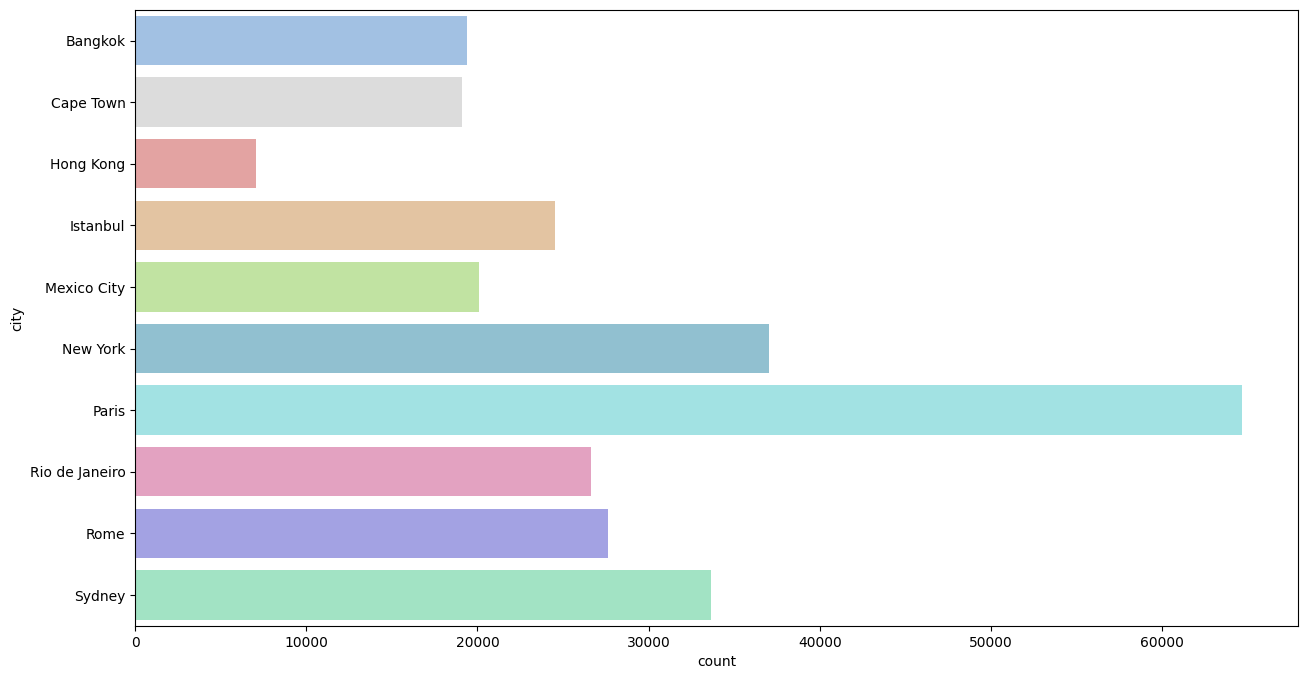

In [ ]:
sns.countplot(df_airbnb['city'].sort_values(),palette = colors)
df_airbnb['city'].value_counts().sort_index()

From above countplot it is clearly evident that more properties are available in Paris of count 64690 followed by NewYork 37012 and Sydney 33630. Least property is in HongKong city with total properties of 7087.

# Room type

Room_type describes the type of room that is being offered for rent. The room_type variable identify guest's preference for a particular room type.



Entire place    182005
Hotel room        5857
Private room     86988
Shared room       4862
Name: room_type, dtype: int64

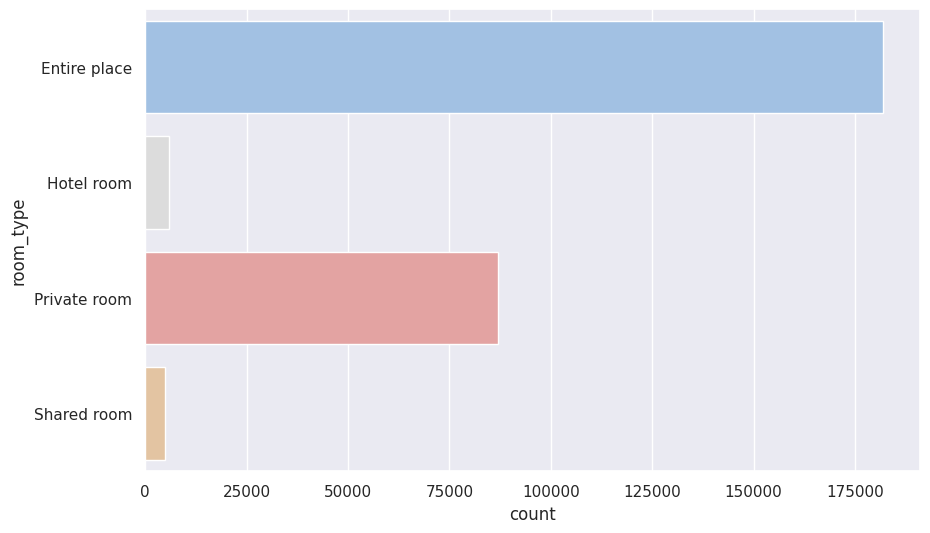

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(df_airbnb['room_type'].sort_values(),palette = colors)
df_airbnb['room_type'].value_counts().sort_index()

From above countplot we can infer that most of the properties available are Entire place with a count of 182005. Next to Entire place is Private room having 86988 properties. Comparatively Shared room and Hotel room share the same number of properties

# Instant_bookable

This variable can help hosts to optimize their listings for instant bookings, and to improve their overall booking rates and occupancy rates.

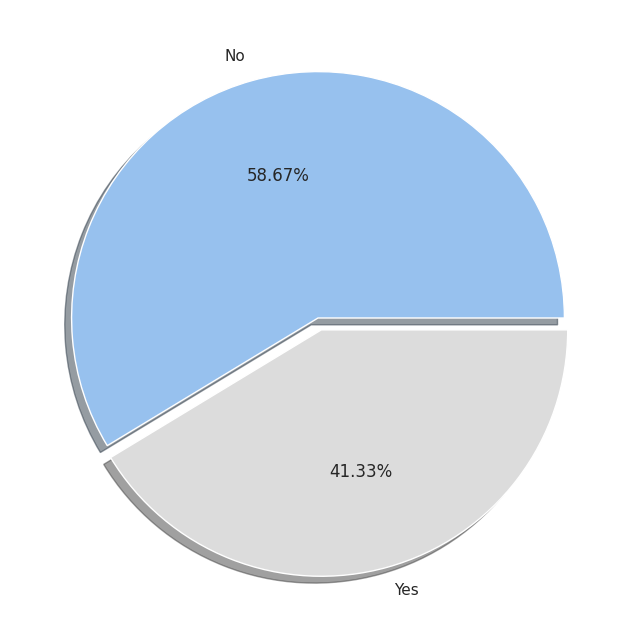

In [ ]:
s = df_airbnb['instant_bookable'].value_counts()

plt.pie(s, labels = ['No','Yes'], autopct = '%.2f%%', shadow = True, explode = [0,0.05],colors = colors)
plt.show()

# Host_response_time

This variable indicates how long it takes for a host to respond to a guest's booking inquiry . The host_response_time variable can be used as a feature to predict the likelihood of a booking


a few days or more     15150
within a day           23425
within a few hours     28891
within an hour        212246
Name: host_response_time, dtype: int64

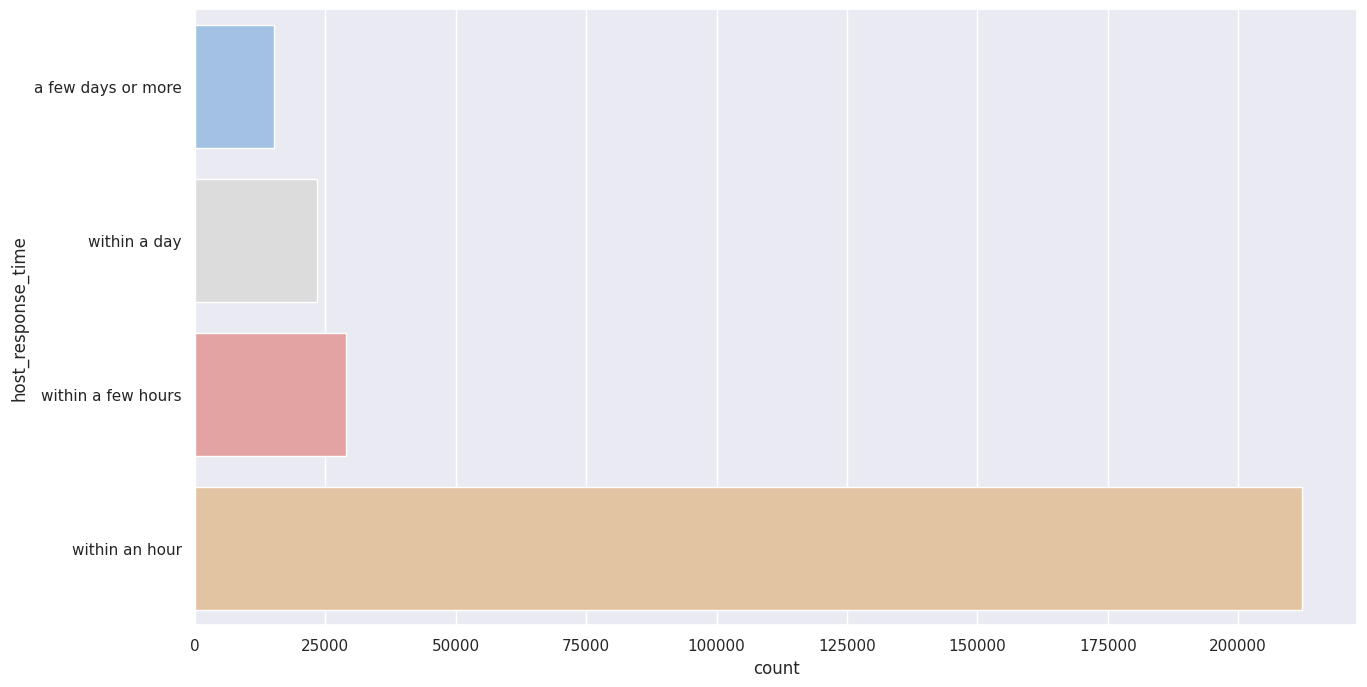

In [ ]:
sns.countplot(df_airbnb['host_response_time'].sort_values(),palette = colors)
df_airbnb['host_response_time'].value_counts().sort_index()


# Bivariate Analysis

City vs Price

city
Bangkok           2078.278033
Cape Town         2405.120350
Hong Kong          746.169889
Istanbul           532.557445
Mexico City       1149.253028
New York           142.842240
Paris              113.096445
Rio de Janeiro     742.589254
Rome               105.107643
Sydney             222.013440
Name: price, dtype: float64

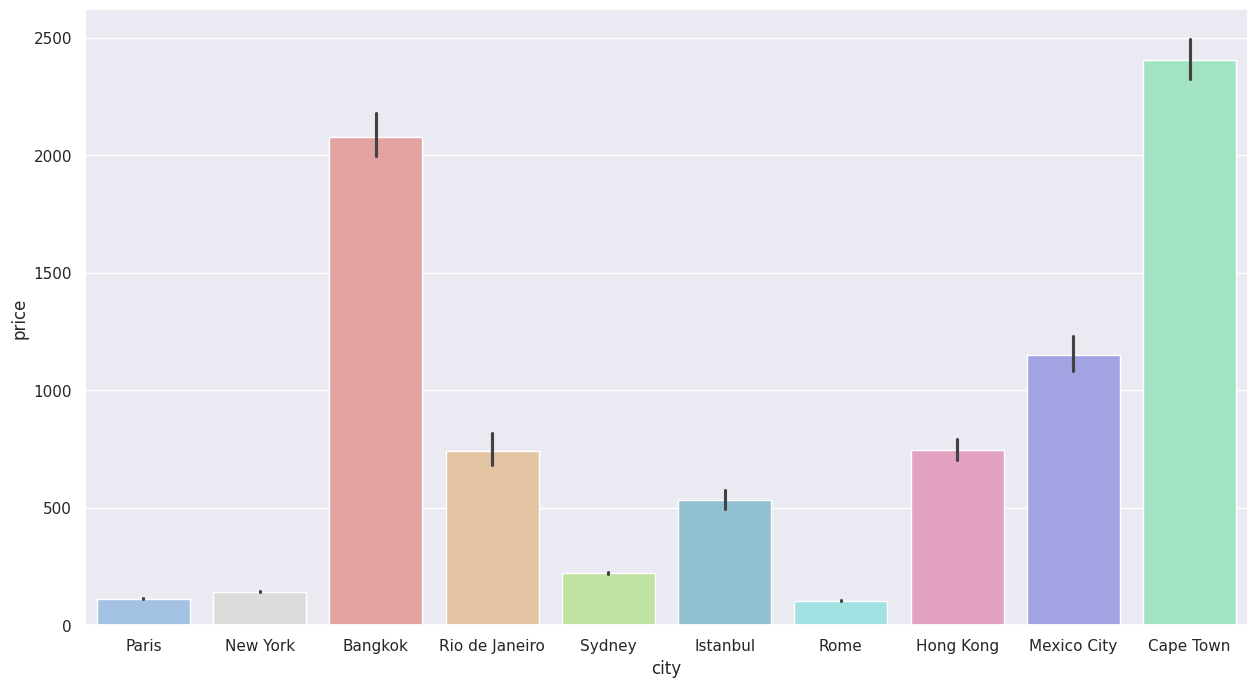

In [ ]:
sns.barplot(x = df_airbnb['city'].sort_values(), y = df_airbnb['price'],palette = colors,)
df_airbnb.groupby('city')['price'].mean()


From the plot we can infer that Highest price is in Cape Town of 2405 per night followed by Bankgkok 2078 per night. Average price is in Mexico of 1149 and least price is in the cities of NewYork, Paris and Rome

# Room_type vs Price

room_type
Entire place    673.352721
Hotel room      800.212908
Private room    462.439038
Shared room     579.921432
Name: price, dtype: float64

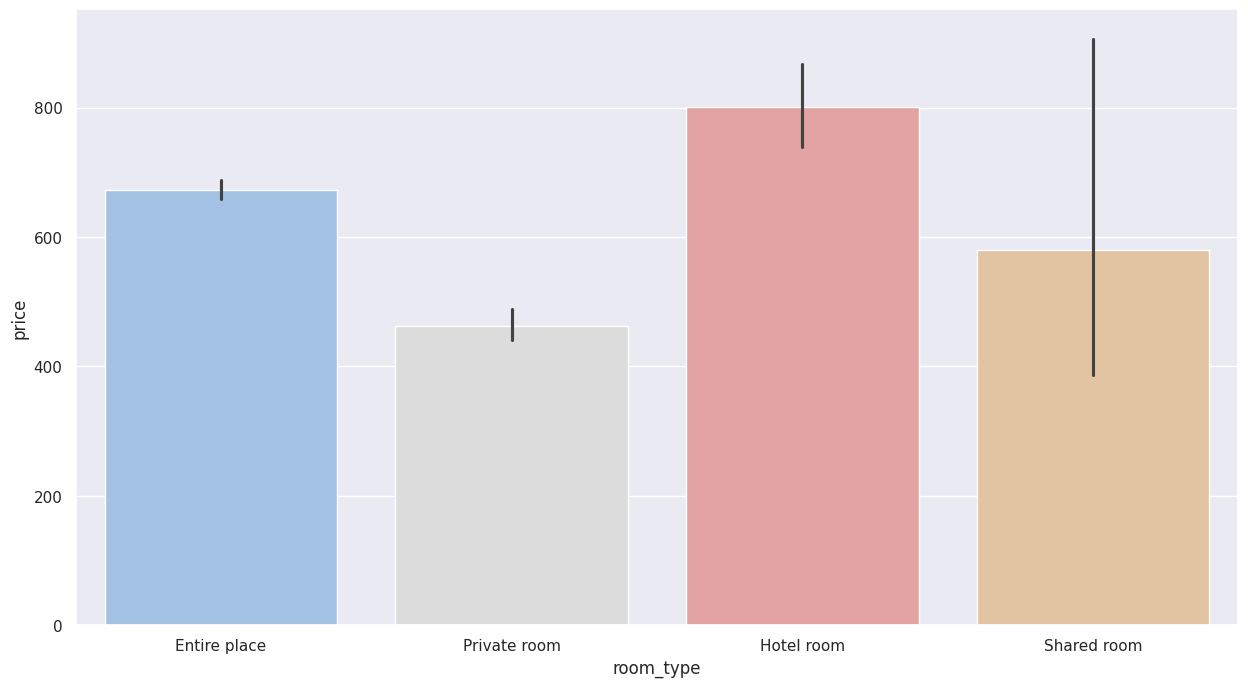

In [ ]:
sns.barplot(x = df_airbnb['room_type'].sort_values(), y = df_airbnb['price'],palette = colors)
df_airbnb.groupby('room_type')['price'].mean()

From above barplot we can see that price for Hotel room and Entire place is expensive compared to Private room and Shared room. The price of former is 800 & 673 and the latter is 462 & 579

# Multivariate Analysis

City vs Price vs Instant bookable

city            instant_bookable
Bangkok         f                   2169.675039
                t                   2017.613732
Cape Town       f                   2801.473752
                t                   1882.076446
Hong Kong       f                    656.047125
                t                    915.575782
Istanbul        f                    449.100128
                t                    599.750939
Mexico City     f                   1132.817645
                t                   1164.994048
New York        f                    142.953026
                t                    142.581612
Paris           f                    103.592961
                t                    133.403385
Rio de Janeiro  f                    734.369976
                t                    758.280359
Rome            f                     92.655377
                t                    114.153303
Sydney          f                    237.827724
                t                    195.695556
Name: p

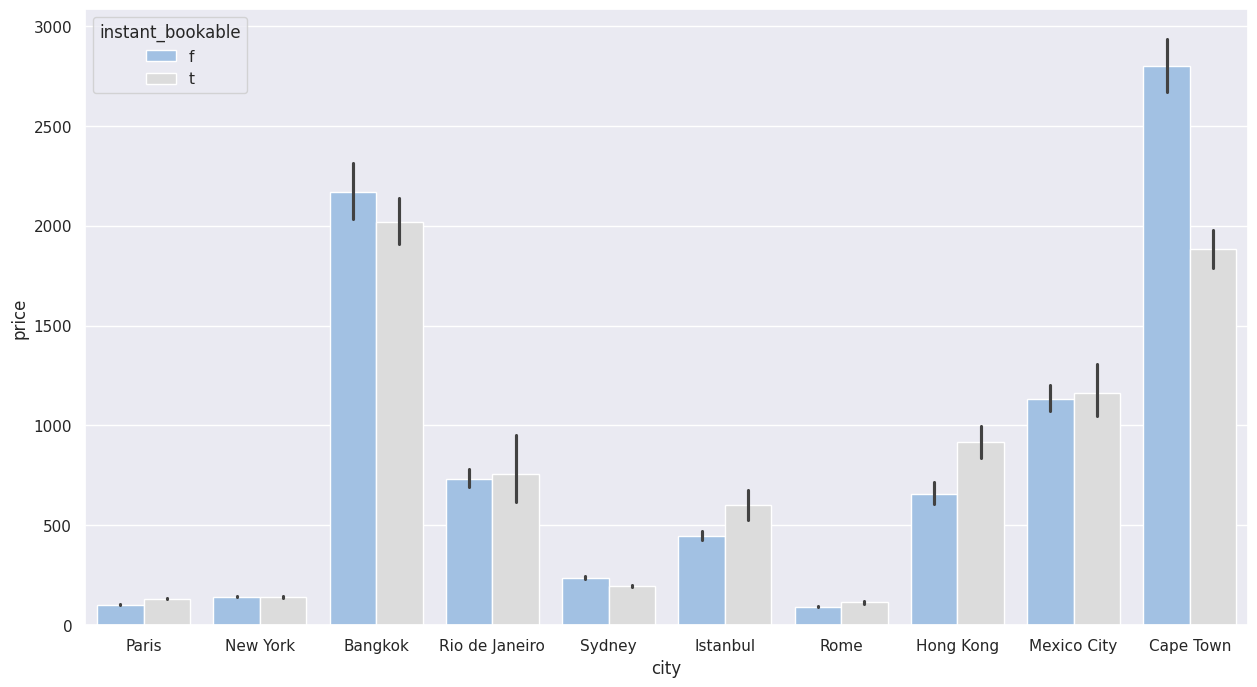

In [ ]:
sns.barplot(x = df_airbnb['city'].sort_values(), y = df_airbnb['price'], hue = df_airbnb['instant_bookable'],
            palette = colors)

df_airbnb.groupby(['city','instant_bookable'])['price'].mean()

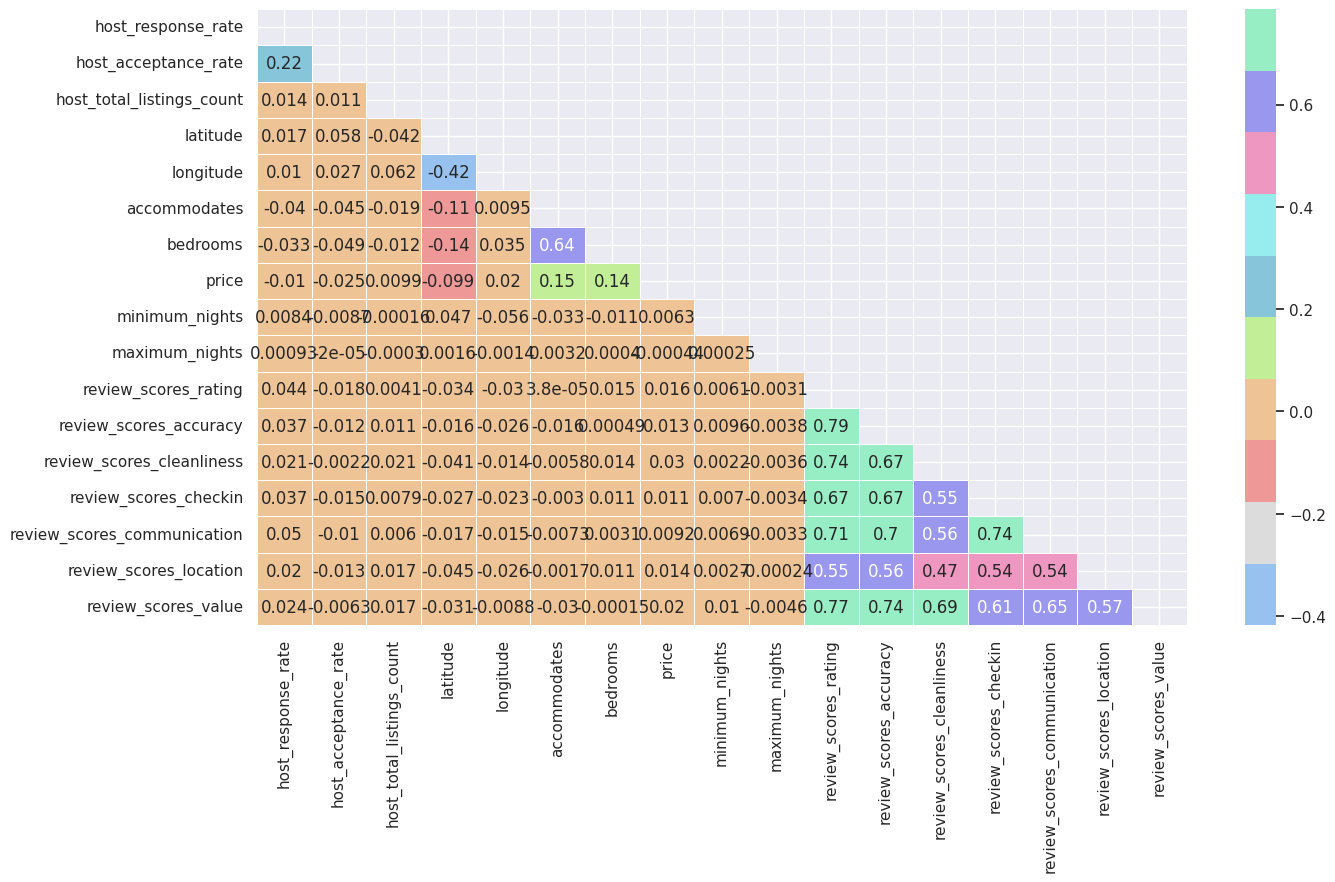

In [ ]:
sns.heatmap(df_airbnb.corr(), annot = True, cmap = colors,linewidth = 0.6,mask = np.triu(df_airbnb.corr()))
plt.show()

# **Hypothesis :**
    
H0 (Null Hypothesis) : There is no significant relationship between the variables being tested.

Ha (Alternative Hypothesis) : There is a significant relationship between the variables being tested
    
Consider significance level as 0.05

In [ ]:
num_cols = df_airbnb.select_dtypes(include = np.number).columns
num_cols
# import stats for performing statistical tests
import scipy.stats as stats

In [ ]:
# Creating a dataframe to store the values

statistical_result = pd.DataFrame(columns = ['Columns','Pvalue','Remarks'])

In [ ]:
# Numerical vs Categorical(Instant_bookable) - f_oneway

for i in num_cols:
    groups = [df_airbnb.loc[df_airbnb['instant_bookable'] == subclass , i] for subclass
              in df_airbnb['instant_bookable'].unique()]

    stat , pval = stats.f_oneway(*groups)

    statistical_result = statistical_result.append({'Columns': i , 'Pvalue': pval ,
                                                    'Remarks': 'Reject H0' if pval < 0.05 else 'Failed to reject H0'},
                                                  ignore_index = True)

In [ ]:
cat_cols = df_airbnb.select_dtypes(exclude = np.number).columns.to_list()
print(cat_cols)

['host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'city', 'property_type', 'room_type', 'amenities', 'instant_bookable']


In [ ]:
cat_cols.remove('instant_bookable')
print(cat_cols)

['host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'city', 'property_type', 'room_type', 'amenities']


In [ ]:
# Categorical vs Categorical(Instant_bookable) - chi2_contingency

for i in cat_cols:
    stat , pval , dof , expected = stats.chi2_contingency(pd.crosstab(df_airbnb[i],df_airbnb['instant_bookable']))

    statistical_result = statistical_result.append({'Columns':i , 'Pvalue': pval ,
                                                   'Remarks' : 'Reject H0' if pval < 0.05 else 'Failed to reject H0'},
                                                  ignore_index = True)

In [ ]:
statistical_result

,Columns,Pvalue,Remarks
0,host_response_rate,1.232605e-06,Reject H0
1,host_acceptance_rate,0.000000e+00,Reject H0
2,host_total_listings_count,4.744171e-206,Reject H0
3,latitude,1.175824e-01,Failed to reject H0
4,longitude,3.543214e-134,Reject H0
5,accommodates,7.925927e-07,Reject H0
6,bedrooms,7.524859e-19,Reject H0
7,price,4.661741e-13,Reject H0
8,minimum_nights,3.962944e-124,Reject H0
9,maximum_nights,6.250180e-01,Failed to reject H0


# Insights from statistical test

From above performed statistical tests we can conclude that all of the columns except latitude and maximum_nights has rejected null hypotheses which means the columns are significant to the target variable instant_bookable. The variables latitude , maximum_nights and host_has_profile_pic can be dropped as they are insignificant to the target variable. Longitude alone doesnt make sense to the model so removing longitude also.

In [ ]:
df_airbnb.drop(columns = ['latitude','longitude','maximum_nights'] , inplace = True)

# ENCODE

In [ ]:
cat=df_airbnb.select_dtypes(include=object).columns
cat

Index(['host_response_time', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'city', 'property_type',
       'room_type', 'amenities', 'instant_bookable'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for each in cat:
   df_airbnb[each]=le.fit_transform(df_airbnb[each])

# SPLITTING X & Y & SMOTE

In [ ]:
x = df_airbnb.drop(columns = ['instant_bookable'])
y = df_airbnb['instant_bookable']
smote = SMOTE(random_state=10)
x_re, y_re = smote.fit_resample(x, y)


Splitting the dataset randomly into train and test dataset using ratio of 70:30

In [ ]:
xtrain , xtest , ytrain , ytest = train_test_split(x_re, y_re,test_size = 0.30,random_state = 24)

# CHECKING & TREATING OUTLIER

In [ ]:
num_cols = xtrain.select_dtypes(include = np.number).columns
num_cols

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'city', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'amenities', 'price', 'minimum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

For train data

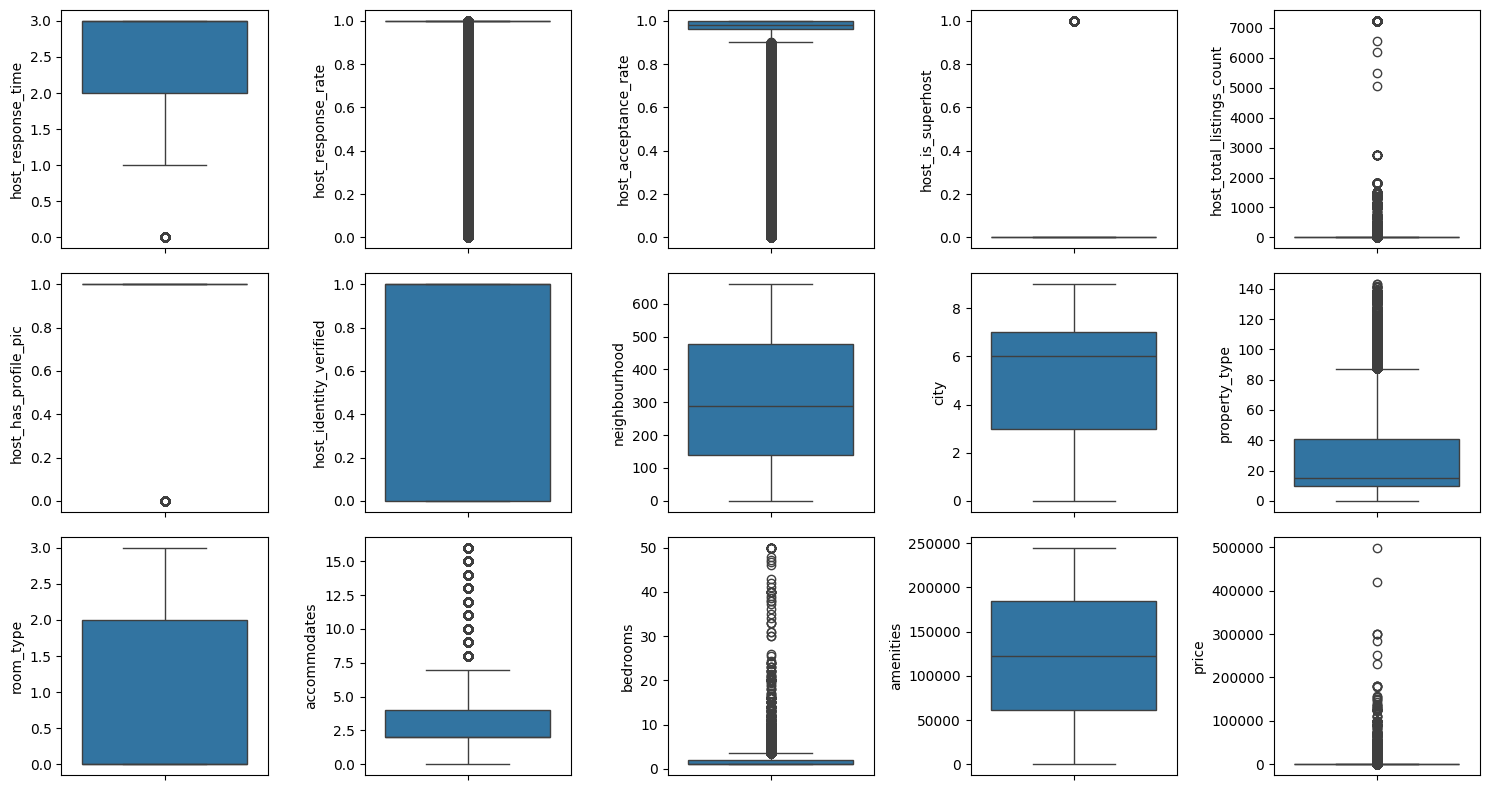

In [ ]:
f , ax = plt.subplots(3,5)

for i,v in zip(num_cols,ax.flatten()):
    sns.boxplot(y = xtrain[i] , ax = v)

plt.tight_layout()
plt.show()

For test data

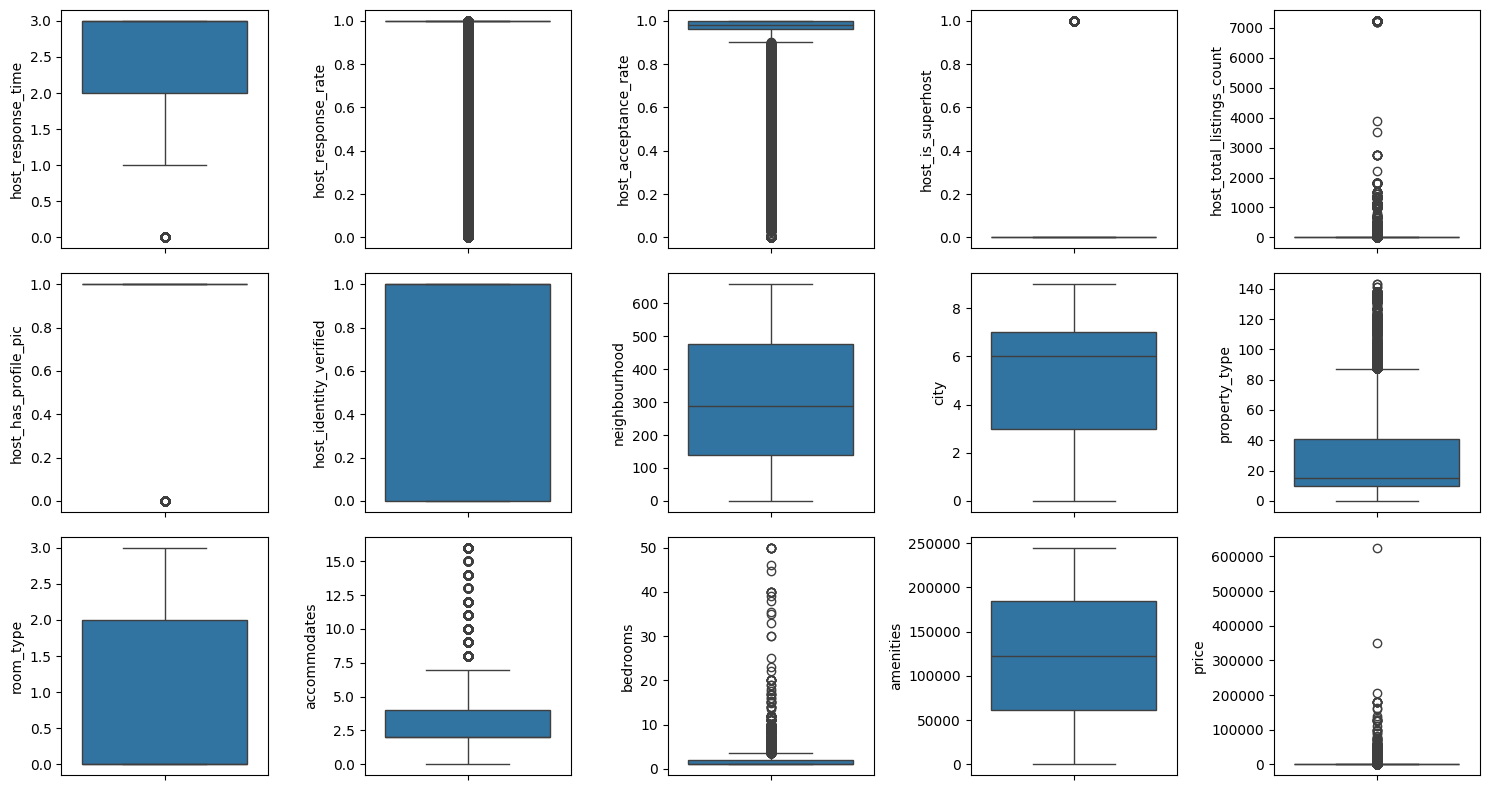

In [ ]:
f , ax = plt.subplots(3,5)

for i,v in zip(num_cols,ax.flatten()):
    sns.boxplot(y = xtest[i] , ax = v)

plt.tight_layout()
plt.show()

From above box plots it is clearly evident that there are outliers . By doing IQR method we tend
lose data. Hence we go forward by doing transformation technique

In [ ]:
out_cols = ['host_response_rate','host_acceptance_rate','host_is_superhost','host_total_listings_count','accommodates', 'bedrooms','price',
           'property_type','host_has_profile_pic', 'host_response_time']

In [ ]:
pt = PowerTransformer()

for i in out_cols:
    variable = pt.fit(xtrain[[i]])
    xtrain[i] = pt.transform(xtrain[[i]])

    with open(f'Transformation\\{i}.pkl','wb') as file:
        pickle.dump(variable,file)

    xtest[i] = pt.transform(xtest[[i]])

# Scaling Of Numerical variable

In [ ]:
num_cols = ['host_response_rate','host_acceptance_rate','host_total_listings_count','accommodates', 'bedrooms','price','minimum_nights','review_scores_rating',
           'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
           'review_scores_cleanliness','review_scores_accuracy']

ss = StandardScaler()

for i in num_cols:
    variable = ss.fit(xtrain[[i]])
    xtrain[i] = ss.transform(xtrain[[i]])

    with open(f'Scaling\\scaling_{i}.pkl','wb') as file:
        pickle.dump(variable,file)


    xtest[i] = ss.transform(xtest[[i]])

# ENCODED RECHECK

In [ ]:
df_airbnb['host_response_time'].unique()

array([3, 2, 1, 0])

In [ ]:
df_airbnb['room_type'].unique()

array([0, 2, 1, 3])

In [ ]:
df_airbnb['host_is_superhost'].unique()

array([0, 1])

In [ ]:
df_airbnb['host_identity_verified'].unique()

array([0, 1])

In [ ]:
df_airbnb['instant_bookable'].unique()

array([0, 1])

In [ ]:
df_airbnb['property_type'].unique()

array([ 10,  25,  23,  15,  41,  81,  29,  26,  64,  28,  12,  53,  61,
        77,  84,  86,  60,  87,  31,   9,  19,  88,  16,   5,  89,  71,
        20,  98,  94,  73,  43,  56,  47, 138,  48,  79,  63,  45,   3,
        14,  32,  93,  11,  44,   4,  13, 143,   1,  21,   7,  76,  66,
        22,  40, 101,  18,  72,  49,   6,  34,  52,  54,  85,  58,   0,
        37,   8,  38,  57,  55,  78,  83,  74,  95,  27,  17,  39,  97,
        24, 137,  65, 142,  42,  50,  35, 120, 111, 135, 122, 119, 118,
       104, 102, 131,  80,  68, 110, 127, 134,  59,  90,  30, 133, 113,
       136, 107, 141, 112,  75, 117, 105,  99, 106,  67,  70, 121, 114,
       116, 130, 100, 123,  69, 115,  82, 126,  96, 140, 132, 109,  91,
       129, 103, 108, 124,   2, 125, 128,  46,  92,  36,  51,  33,  62,
       139])

In [ ]:
df_airbnb['city'].unique()

array([6, 5, 0, 7, 9, 3, 8, 2, 4, 1])

# Checking for Multicollinearity

In [ ]:
xtrain.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'city', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'amenities', 'price', 'minimum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

In [ ]:
num_cols = ['host_response_rate','host_acceptance_rate','host_total_listings_count',
           'accommodates','bedrooms','price','minimum_nights','review_scores_rating','review_scores_accuracy',
           'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
           'review_scores_value']

In [ ]:
# Creating a copy of the dataset

xtrain_copy = xtrain.copy()

# considering only numerical variables to check multicollinearity

xtrain_copy = xtrain_copy.loc[:,num_cols]

<Axes: >

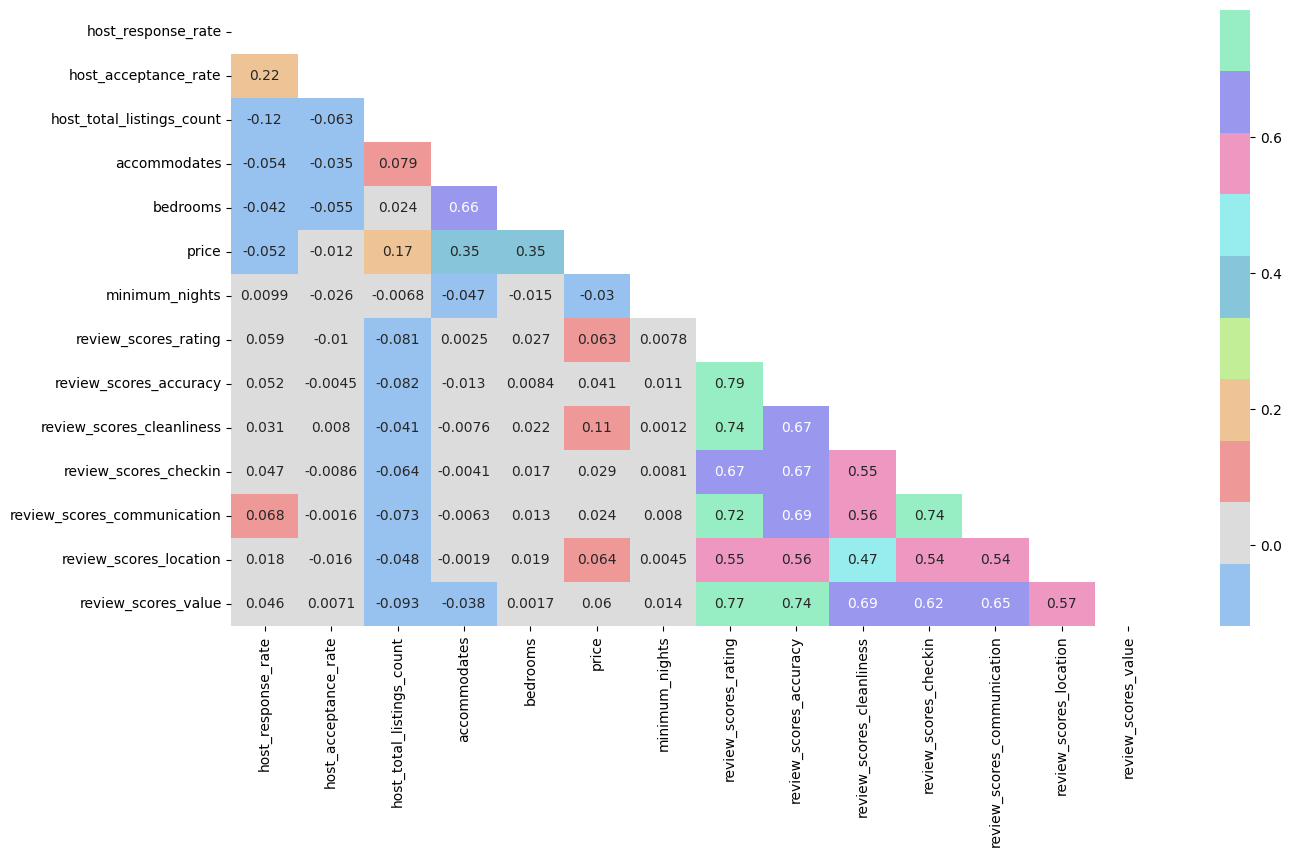

In [ ]:
sns.heatmap(xtrain_copy.corr() , annot = True , mask = np.triu(xtrain_copy.corr()) , cmap = colors)

# Calculating variance inflation factor

In [ ]:
vif_values = []

for i in range(xtrain_copy.shape[1]):
    vif_values.append(variance_inflation_factor(xtrain_copy.values,i))

vif_df = pd.DataFrame({'Columns': xtrain_copy.columns , 'VIF': vif_values})

vif_df

,Columns,VIF
0,host_response_rate,1.072354
1,host_acceptance_rate,1.059321
2,host_total_listings_count,1.060089
3,accommodates,1.833644
4,bedrooms,1.826896
5,price,1.229226
6,minimum_nights,1.004174
7,review_scores_rating,4.184556
8,review_scores_accuracy,3.317788
9,review_scores_cleanliness,2.454755


# Checking for class imbalance in target variable

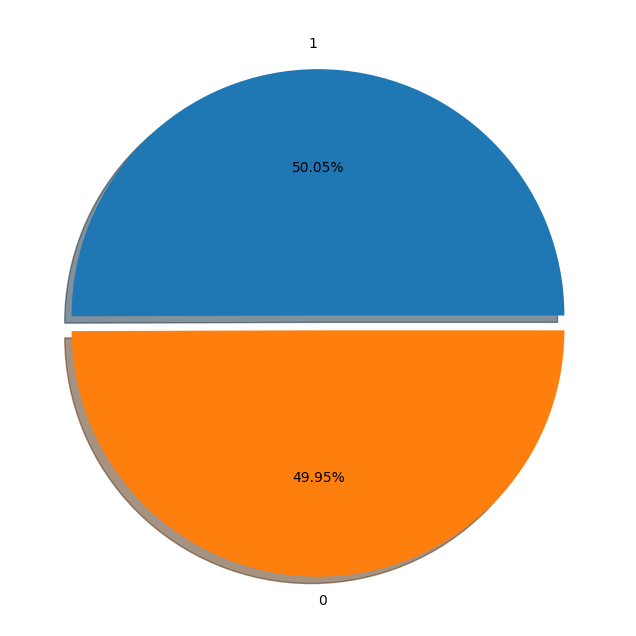

In [ ]:
s = ytrain.value_counts()

plt.pie(s , labels = s.index , autopct = '%.2f%%' , shadow = True , explode = [0.01,0.05])
plt.show()

# Building a base model

Building a base model using Logistic Regression as it is having the highest explanatory power
compared to other models



In [ ]:
model_lr = sma.Logit(ytrain,sma.add_constant(xtrain)).fit()

model_lr

Optimization terminated successfully.
         Current function value: 0.622533
         Iterations 6


Checking for summary

In [ ]:
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       instant_bookable   No. Observations:               229747
Model:                          Logit   Df Residuals:                   229723
Method:                           MLE   Df Model:                           23
Date:                Tue, 05 Mar 2024   Pseudo R-squ.:                  0.1019
Time:                        05:38:38   Log-Likelihood:            -1.4303e+05
converged:                       True   LL-Null:                   -1.5925e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.7564      0.019     39.891      0.000       0.719       0.794
host_response_time              0.0714      0.006     11.785      0.000       0.060       0.083
host_response_rate             -0.1952      0.006    -31.789      0.000      -0.207      -0.183
host_acceptance_rate            0.7013      0.005    129.764      0.000       0.691       0.712
host_is_superhost              -0.0196      0.005     -4.208      0.000      -0.029      -0.010
host_total_listings_count       0.2614      0.005     53.988      0.000       0.252       0.271
host_has_profile_pic           -0.0171      0.004     -3.839      0.000      -0.026      -0.008
host_identity_verified         -0.2219      0.010    -21.763      0.000      -0.242      -0.202
neighbourhood                  -0.0003    2.4e-05    -14.310      0.000      -0.000      -0.000
city                           -0.0314      0.002    -13.574      0.000      -0.036      -0.027
property_type                   0.5045      0.009     53.595      0.000       0.486       0.523
room_type                      -0.4030      0.010    -39.499      0.000      -0.423      -0.383
accommodates                   -0.0094      0.007     -1.426      0.154      -0.022       0.004
bedrooms                        0.0170      0.006      2.755      0.006       0.005       0.029
amenities                   -6.482e-07   6.65e-08     -9.750      0.000   -7.79e-07   -5.18e-07
price                           0.0017      0.007      0.253      0.800      -0.011       0.015
minimum_nights                 -0.1558      0.006    -24.156      0.000      -0.168      -0.143
review_scores_rating           -0.1689      0.009    -17.800      0.000      -0.187      -0.150
review_scores_accuracy         -0.0077      0.008     -0.924      0.355      -0.024       0.009
review_scores_cleanliness       0.0894      0.007     12.509      0.000       0.075       0.103
review_scores_checkin          -0.0067      0.007     -0.905      0.366      -0.021       0.008
review_scores_communication    -0.0411      0.008     -5.234      0.000      -0.056      -0.026
review_scores_location          0.0663      0.006     11.119      0.000       0.055       0.078
review_scores_value             0.0271      0.008      3.346      0.001       0.011       0.043
===============================================================================================
"""

Calculating various metrics to evaluate the model performance

In [ ]:
pred_prob_train = model_lr.predict(sma.add_constant(xtrain))
pred_prob_test = model_lr.predict(sma.add_constant(xtest))

In [ ]:
# Calculating youden's index to convert probability prediction to class prediction

# For train data

fpr , tpr , threshold = roc_curve(ytrain,pred_prob_train)

youden_index_train = []

for i,v in zip(fpr , tpr):
    res = v - i
    youden_index_train.append(res)

yi_train = max(np.round(youden_index_train,2))


# For test data

fpr , tpr , threshold = roc_curve(ytest,pred_prob_test)

youden_index_test = []

for i,v in zip(fpr , tpr):
    res = v - i
    youden_index_test.append(res)

yi_test = max(np.round(youden_index_test,2))

print(f'Youdens index for train data is {yi_train}')
print(f'Youdens index for test data is {yi_test}')

Youdens index for train data is 0.31
Youdens index for test data is 0.32


In [ ]:
# Converting probability prediction to class prediction using 0.59 as threshold value

pred_train = [ 1 if i > 0.59 else 0  for i in pred_prob_train]
pred_test = [ 1 if i > 0.59 else 0  for i in pred_prob_test]


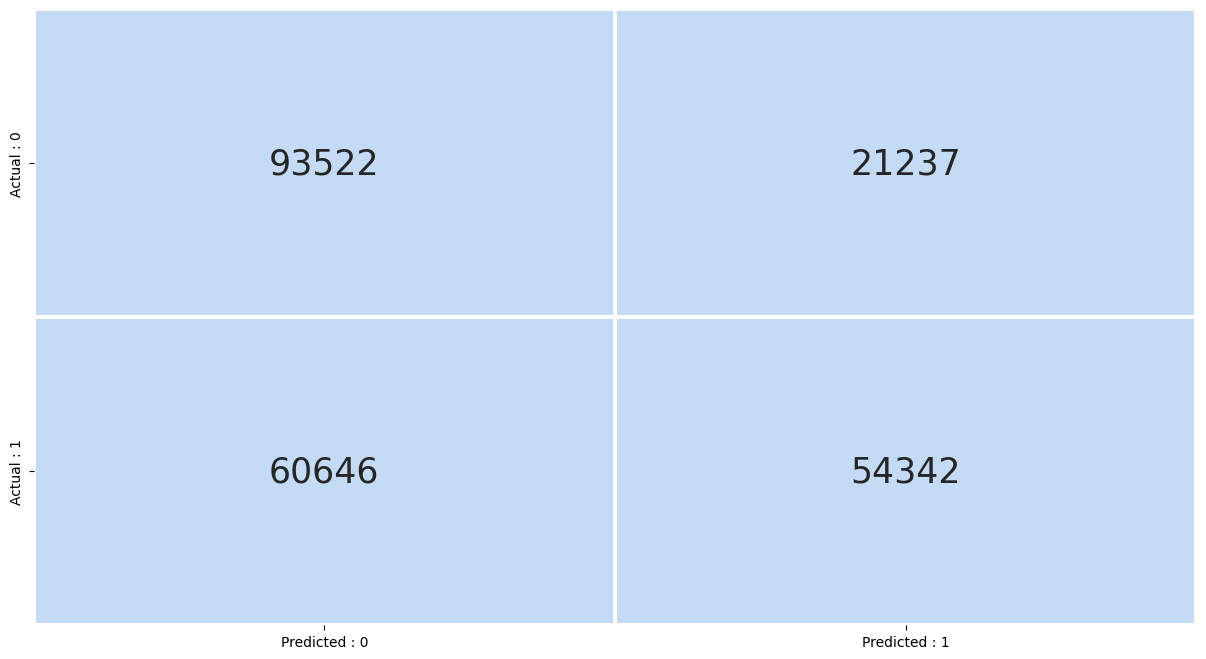

In [ ]:
# plotting confusion matrix for train data

cm = confusion_matrix(ytrain,pred_train)
conf_matrix = pd.DataFrame(data = cm , columns = ['Predicted : 0','Predicted : 1'], index = ['Actual : 0','Actual : 1'])
c = ['#c3dbf5']

sns.heatmap(data = conf_matrix, annot = True , cbar = False , fmt = 'd' , cmap = c , linewidth = 1.5 ,
           annot_kws = {'size' : 25})
plt.show()

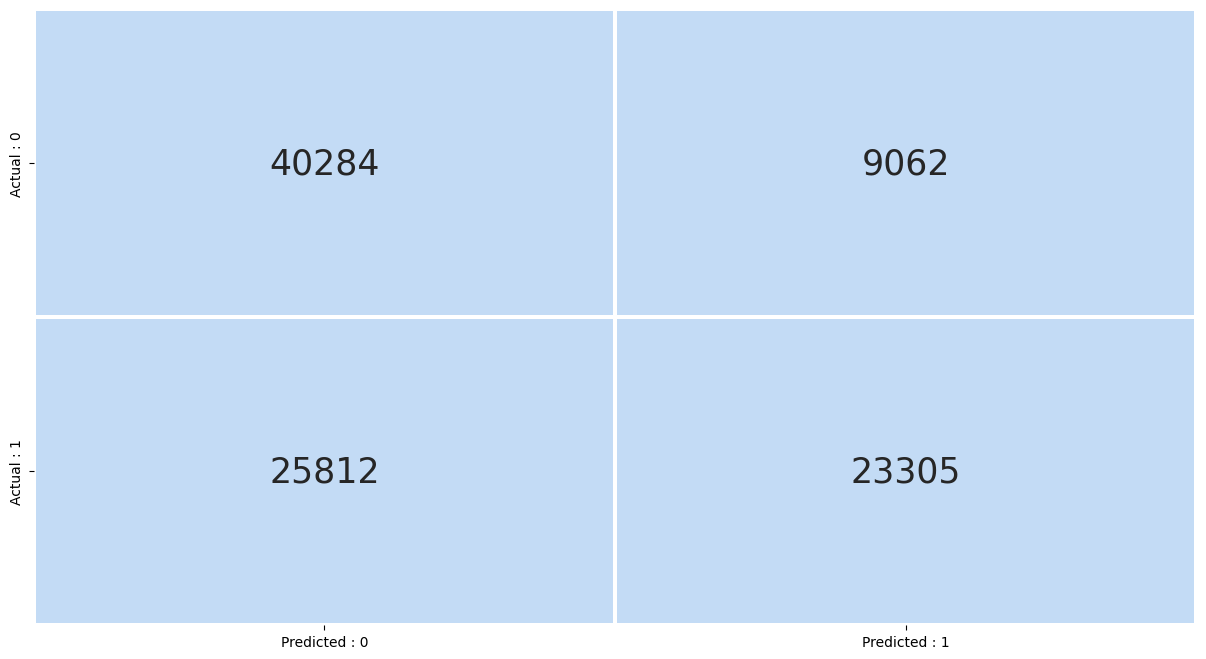

In [ ]:
# plotting confusion matrix for test data

cm = confusion_matrix(ytest,pred_test)
conf_matrix = pd.DataFrame(data = cm , columns = ['Predicted : 0','Predicted : 1'], index = ['Actual : 0','Actual : 1'])
c = ['#c3dbf5']

sns.heatmap(data = conf_matrix, annot = True , cbar = False , fmt = 'd' , cmap = c , linewidth = 1.5 ,
           annot_kws = {'size' : 25})
plt.show()

In [ ]:
# Classification report

print(f'Train report : \n{classification_report(ytrain,pred_train)}\n')
print(f'Testreport : \n{classification_report(ytest,pred_test)}')

Train report : 
              precision    recall  f1-score   support

           0       0.61      0.81      0.70    114759
           1       0.72      0.47      0.57    114988

    accuracy                           0.64    229747
   macro avg       0.66      0.64      0.63    229747
weighted avg       0.66      0.64      0.63    229747


Testreport : 
              precision    recall  f1-score   support

           0       0.61      0.82      0.70     49346
           1       0.72      0.47      0.57     49117

    accuracy                           0.65     98463
   macro avg       0.66      0.65      0.63     98463
weighted avg       0.66      0.65      0.64     98463



From above report we can conclude that our base model has performed good in both train and unseen data with accuracy of 66%. On further progress we try to improve our performance by building other models, tuning their hyperparameters and selecting columns based on feature importance score

Building different models and evaluating using appropriate technique

In [ ]:
# Creating a user defined function to store values of accuracy , f1 score , auc_score of both train and test data

performance_df = pd.DataFrame(columns = ['Model_Name','Train_Accuracy','Train_F1score','Test_Accuracy',
                                         'Test_F1score','Precision_Score','Recall_Score','AUC_Score','Remarks'])

def model_performance(model, name, xtrain = xtrain , xtest = xtest):
    global performance_df

    # predicting train and test data

    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    pred_prob = model.predict_proba(xtest)[:,1]

    # calculating metrics for both train and test data

    acc_train = round(accuracy_score(ytrain,pred_train),2)*100
    acc_test = round(accuracy_score(ytest,pred_test),2)*100
    f1_train = round(f1_score(ytrain,pred_train),2)
    f1_test = round(f1_score(ytest,pred_test),2)
    precision = round(precision_score(ytest,pred_test),2)
    recall = round(recall_score(ytest,pred_test),2)
    auc_score = round(roc_auc_score(ytest,pred_prob),4)

    # defining function for remarks

    def remark(train_acc,test_acc):
        if abs(train_acc - test_acc) > 3 or train_acc > 95:
            return 'Over Fit'
        elif train_acc < 65 or test_acc < 65:
            return 'Under Fit'
        else:
            return 'Good Fit'

    # adding train and test scores in performance_df dataframe

    performance_df = performance_df.append({'Model_Name':name,'Train_Accuracy':acc_train,'Train_F1score':f1_train,
                                           'Test_Accuracy':acc_test,'Test_F1score':f1_test,
                                            'Precision_Score':precision , 'Recall_Score':recall,
                                           'AUC_Score':auc_score,'Remarks':remark(acc_train,acc_test)},ignore_index=True)

    # plotting roc_curve and calculating auc_score

    fpr , tpr , threshold = roc_curve(ytest,pred_prob)

    plt.plot(fpr,tpr)
    plt.plot([0.0,1.0],'r--')
    plt.text(x = 0.1, y = 1.0, s = ('auc_score',round(roc_auc_score(ytest,pred_test),4)))

    print('Train Report :\n',classification_report(ytrain,pred_train))
    print('Test Report :\n',classification_report(ytest,pred_test))

In [ ]:
# Craeting a user defined function to highlight the rows

def highlight_row(df):
    color_pink = ['background-color : lightpink']*len(df)
    color_white = ['backkground-white : white']*len(df)

    if df['Remarks'] == 'Good Fit':
        return color_green
    else:
        return color_white

In [ ]:
# Appending values of our base model to dataframe

performance_df = performance_df.append({'Model_Name':'Base Model',
                                        'Train_Accuracy':round(accuracy_score(ytrain,pred_train),2)*100,
                                        'Train_F1score':round(f1_score(ytrain,pred_train),2),
                                        'Test_Accuracy':round(accuracy_score(ytest,pred_test),2)*100,
                                        'Test_F1score':round(f1_score(ytest,pred_test),2),
                                        'Precision_Score':round(precision_score(ytest,pred_test),2),
                                        'Recall_Score':round(recall_score(ytest,pred_test),2),
                                        'AUC_Score':roc_auc_score(ytest,pred_prob_test),
                                        'Remarks':'Base'},ignore_index=True)

In [ ]:
performance_df

,Model_Name,Train_Accuracy,Train_F1score,Test_Accuracy,Test_F1score,Precision_Score,Recall_Score,AUC_Score,Remarks
0,Base Model,64.0,0.57,65.0,0.57,0.72,0.47,0.715325,Base


In [ ]:

xtrain.to_csv('xtrain1.csv', index=False)

ytrain.to_csv('ytrain1.csv', index=False)

xtest.to_csv('xtest1.csv', index=False)

ytest.to_csv('ytest1.csv', index=False)

Train Report :
               precision    recall  f1-score   support

           0       0.50      1.00      0.67    114759
           1       0.00      0.00      0.00    114988

    accuracy                           0.50    229747
   macro avg       0.25      0.50      0.33    229747
weighted avg       0.25      0.50      0.33    229747

Test Report :
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     49346
           1       0.00      0.00      0.00     49117

    accuracy                           0.50     98463
   macro avg       0.25      0.50      0.33     98463
weighted avg       0.25      0.50      0.33     98463



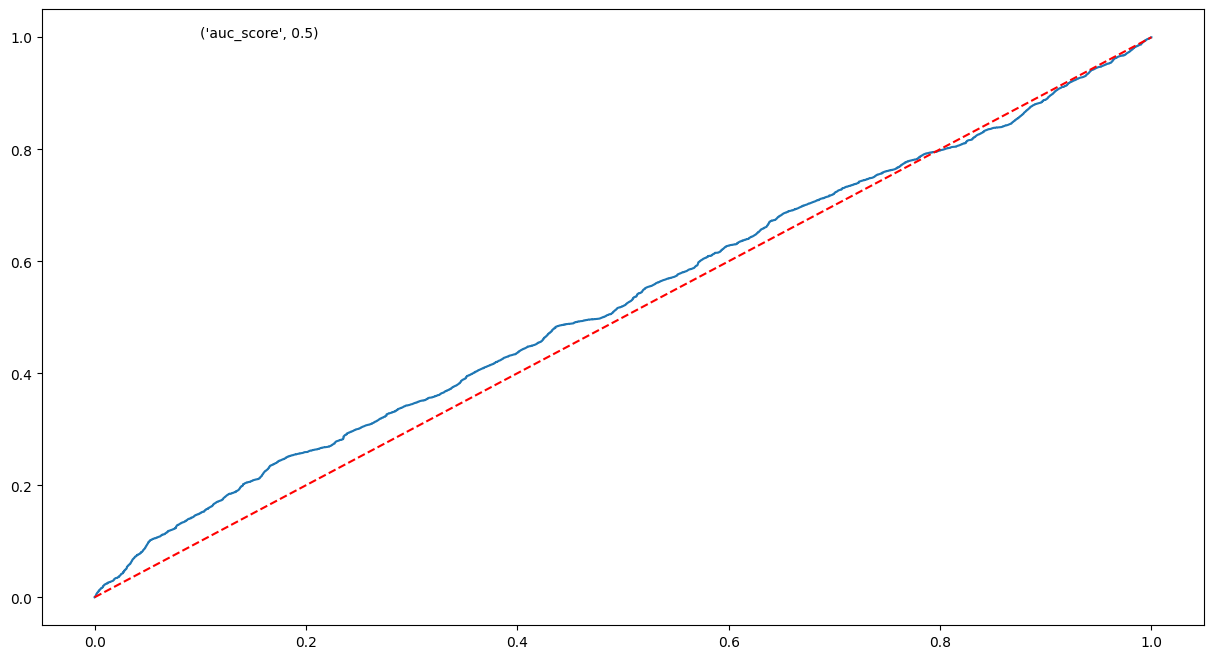

In [ ]:
# logistic regression

model_lrs = LogisticRegression().fit(xtrain,ytrain)

model_performance(model_lrs,'Logistic Regression sklearn')

Train Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    114759
           1       1.00      1.00      1.00    114988

    accuracy                           1.00    229747
   macro avg       1.00      1.00      1.00    229747
weighted avg       1.00      1.00      1.00    229747

Test Report :
               precision    recall  f1-score   support

           0       0.71      0.71      0.71     49346
           1       0.71      0.71      0.71     49117

    accuracy                           0.71     98463
   macro avg       0.71      0.71      0.71     98463
weighted avg       0.71      0.71      0.71     98463



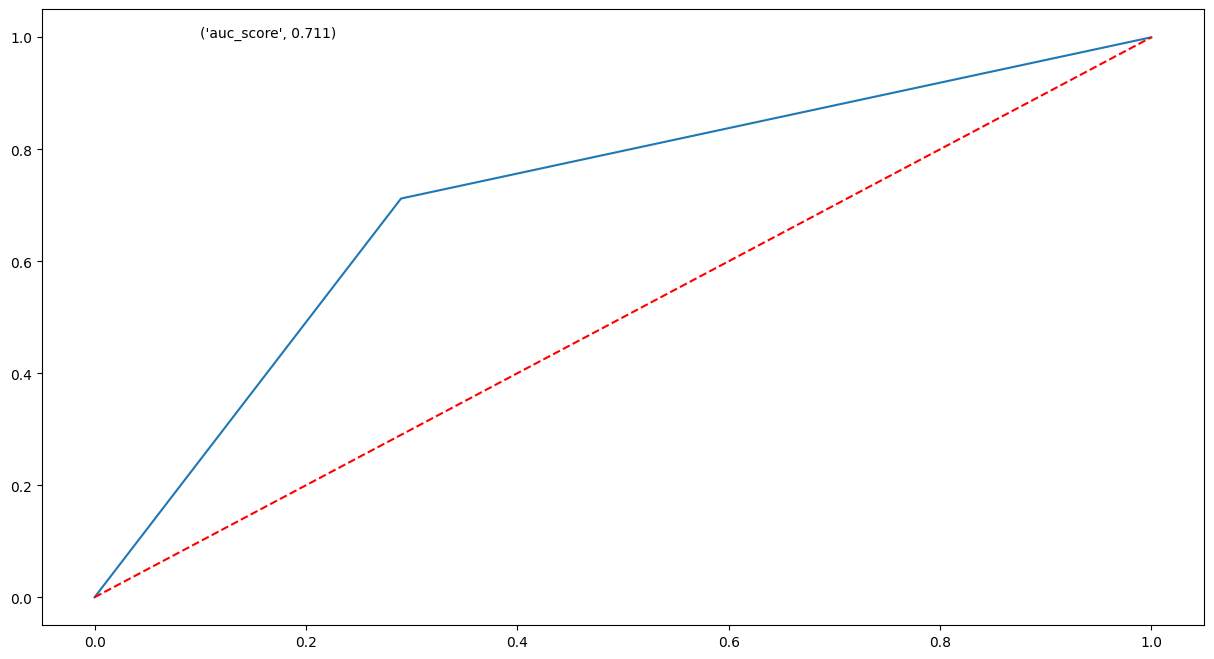

In [ ]:
# DecisionTree Model without tuning

model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)

model_performance(model_dt,'DecisionTree Model without tuning')

Train Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    114759
           1       1.00      1.00      1.00    114988

    accuracy                           1.00    229747
   macro avg       1.00      1.00      1.00    229747
weighted avg       1.00      1.00      1.00    229747

Test Report :
               precision    recall  f1-score   support

           0       0.75      0.83      0.79     49346
           1       0.81      0.73      0.77     49117

    accuracy                           0.78     98463
   macro avg       0.78      0.78      0.78     98463
weighted avg       0.78      0.78      0.78     98463



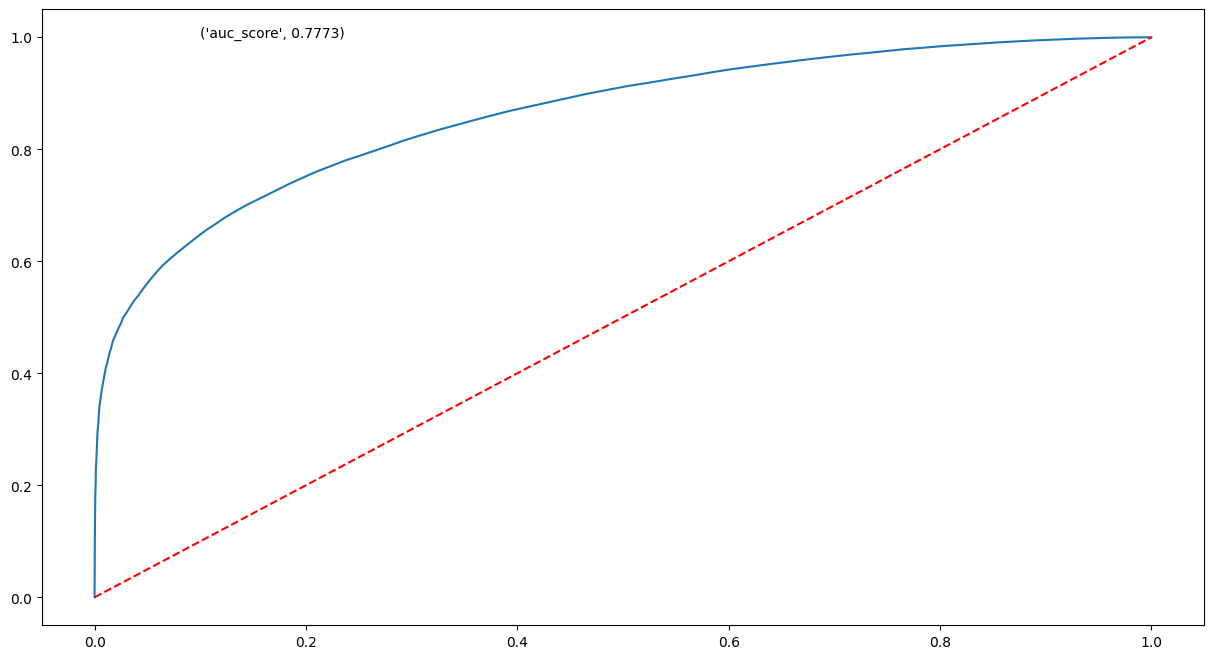

In [ ]:
# Random Forest without tuning

model_rf = RandomForestClassifier().fit(xtrain,ytrain)

model_performance(model_rf,'Random Forest without tuning')

Train Report :
               precision    recall  f1-score   support

           0       0.71      0.73      0.72    114759
           1       0.72      0.70      0.71    114988

    accuracy                           0.72    229747
   macro avg       0.72      0.72      0.72    229747
weighted avg       0.72      0.72      0.72    229747

Test Report :
               precision    recall  f1-score   support

           0       0.71      0.73      0.72     49346
           1       0.72      0.70      0.71     49117

    accuracy                           0.72     98463
   macro avg       0.72      0.72      0.72     98463
weighted avg       0.72      0.72      0.72     98463



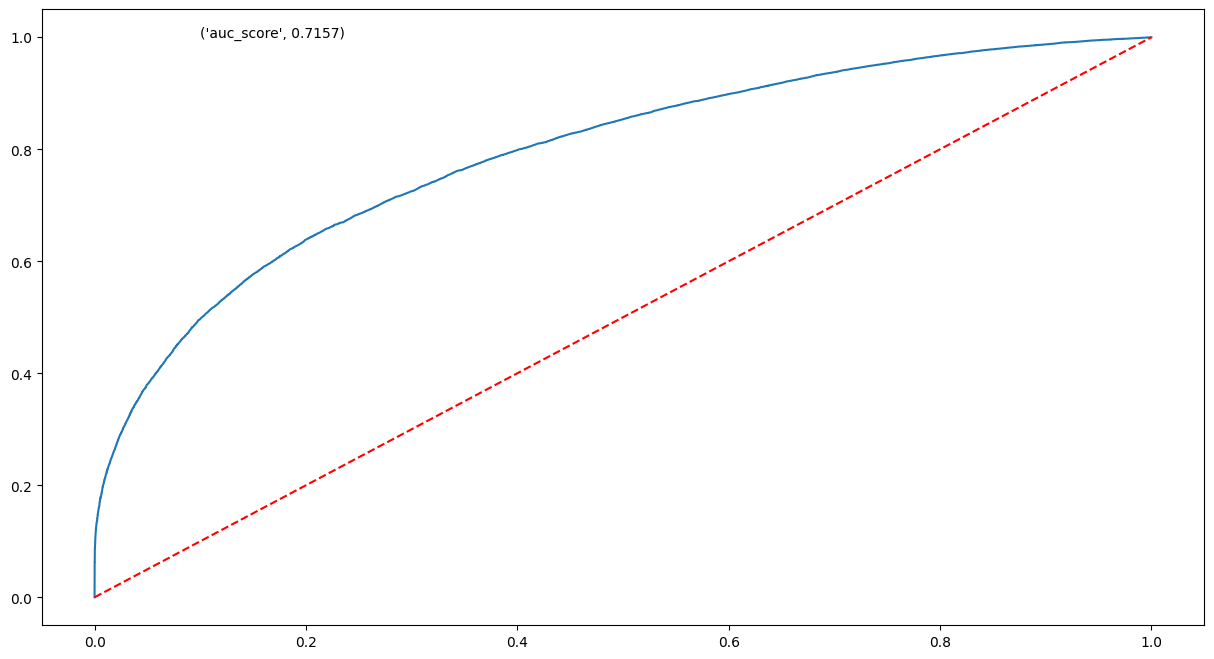

In [ ]:
# AdaBoost without tuning

model_ab = AdaBoostClassifier().fit(xtrain,ytrain)

model_performance(model_ab,'AdaBoost without tuning')

Train Report :
               precision    recall  f1-score   support

           0       0.72      0.79      0.75    114759
           1       0.77      0.69      0.73    114988

    accuracy                           0.74    229747
   macro avg       0.74      0.74      0.74    229747
weighted avg       0.74      0.74      0.74    229747

Test Report :
               precision    recall  f1-score   support

           0       0.72      0.79      0.75     49346
           1       0.76      0.69      0.73     49117

    accuracy                           0.74     98463
   macro avg       0.74      0.74      0.74     98463
weighted avg       0.74      0.74      0.74     98463



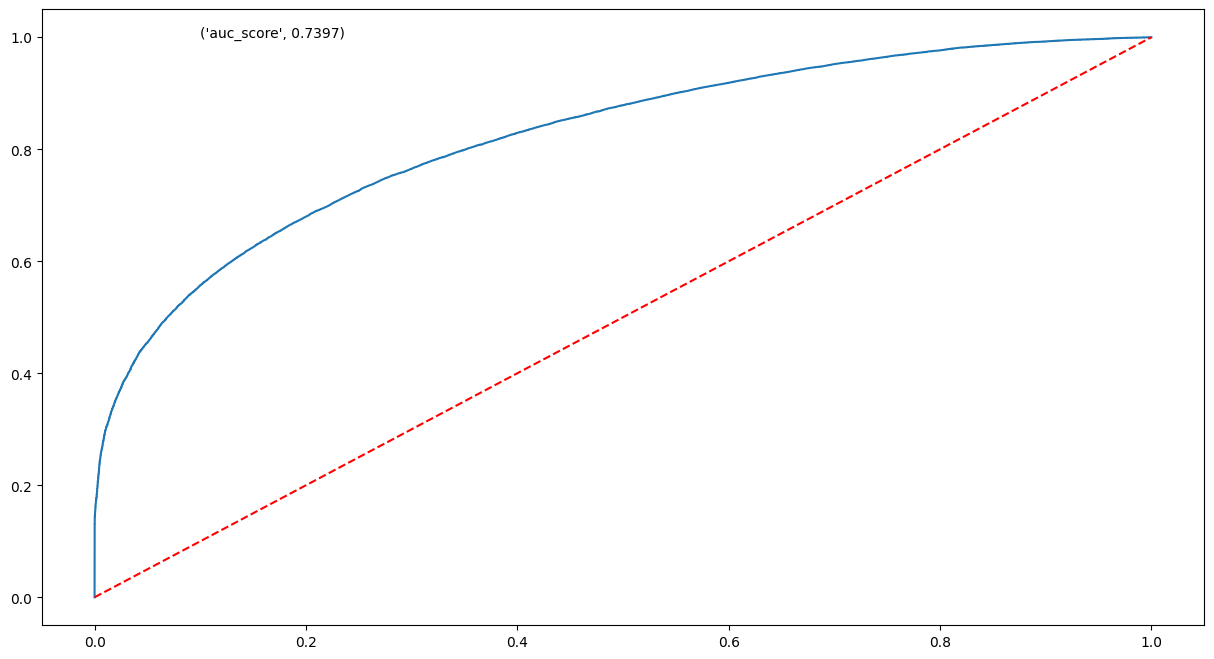

In [ ]:
#gradientBoosting without tuning
model_gb = GradientBoostingClassifier().fit(xtrain,ytrain)

model_performance(model_gb , 'GradientBoosting without tuning')

Train Report :
               precision    recall  f1-score   support

           0       0.60      0.83      0.69    114759
           1       0.72      0.44      0.55    114988

    accuracy                           0.63    229747
   macro avg       0.66      0.63      0.62    229747
weighted avg       0.66      0.63      0.62    229747

Test Report :
               precision    recall  f1-score   support

           0       0.60      0.83      0.70     49346
           1       0.72      0.44      0.55     49117

    accuracy                           0.64     98463
   macro avg       0.66      0.64      0.62     98463
weighted avg       0.66      0.64      0.62     98463



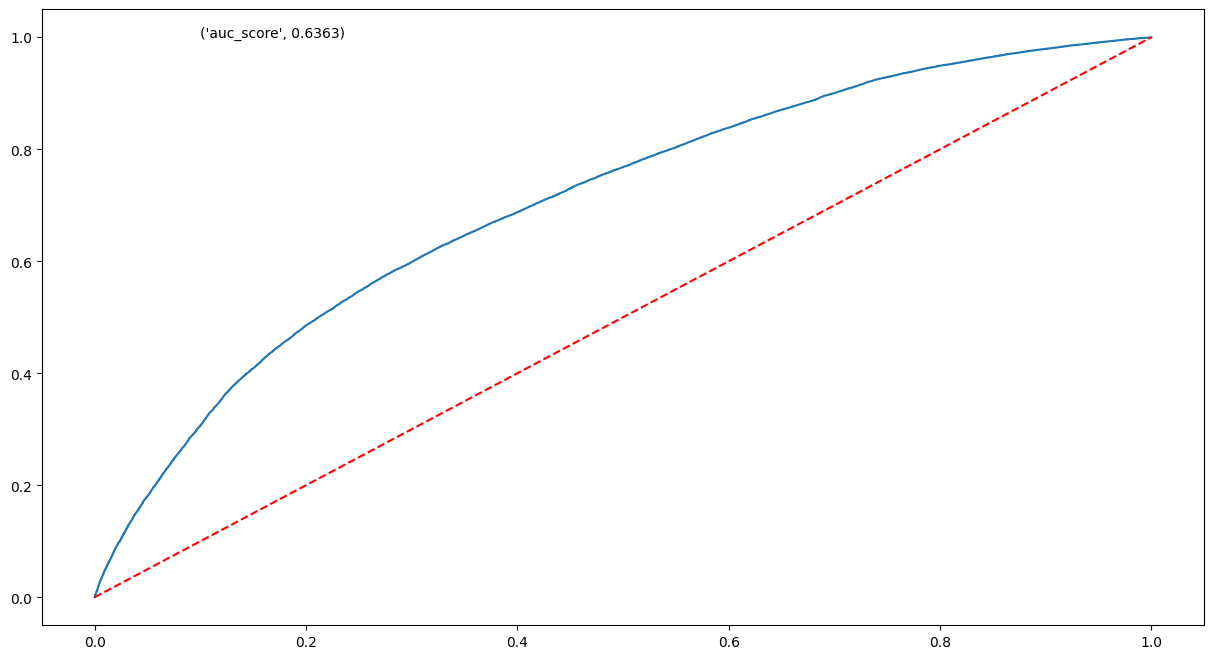

In [ ]:
from sklearn.neural_network import MLPClassifier

model_nn = MLPClassifier().fit(xtrain,ytrain)

model_performance(model_nn , 'Neural Network')

Train Report :
               precision    recall  f1-score   support

           0       0.75      0.84      0.79    114759
           1       0.82      0.72      0.77    114988

    accuracy                           0.78    229747
   macro avg       0.79      0.78      0.78    229747
weighted avg       0.79      0.78      0.78    229747

Test Report :
               precision    recall  f1-score   support

           0       0.74      0.83      0.78     49346
           1       0.80      0.70      0.75     49117

    accuracy                           0.76     98463
   macro avg       0.77      0.76      0.76     98463
weighted avg       0.77      0.76      0.76     98463



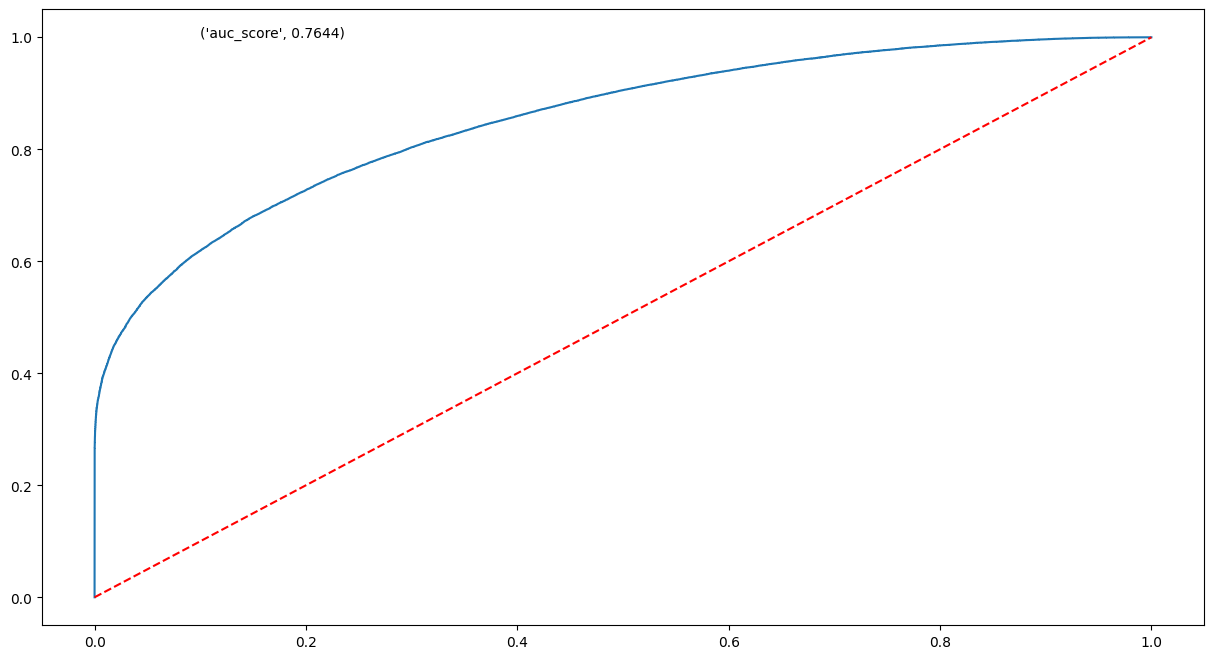

In [ ]:
# XGB without tuning

model_xgb = XGBClassifier().fit(xtrain,ytrain)

model_performance(model_xgb,'Xtreme Gradient Boosting  without tuning')

Learning rate set to 0.105
0:	learn: 0.6690388	total: 115ms	remaining: 1m 54s
1:	learn: 0.6501800	total: 180ms	remaining: 1m 29s
2:	learn: 0.6371568	total: 233ms	remaining: 1m 17s
3:	learn: 0.6261790	total: 286ms	remaining: 1m 11s
4:	learn: 0.6136571	total: 344ms	remaining: 1m 8s
5:	learn: 0.6010275	total: 409ms	remaining: 1m 7s
6:	learn: 0.5934738	total: 464ms	remaining: 1m 5s
7:	learn: 0.5874739	total: 522ms	remaining: 1m 4s
8:	learn: 0.5828813	total: 574ms	remaining: 1m 3s
9:	learn: 0.5786949	total: 632ms	remaining: 1m 2s
10:	learn: 0.5745478	total: 691ms	remaining: 1m 2s
11:	learn: 0.5701150	total: 764ms	remaining: 1m 2s
12:	learn: 0.5667284	total: 819ms	remaining: 1m 2s
13:	learn: 0.5643365	total: 875ms	remaining: 1m 1s
14:	learn: 0.5581747	total: 934ms	remaining: 1m 1s
15:	learn: 0.5558830	total: 991ms	remaining: 1m
16:	learn: 0.5543507	total: 1.05s	remaining: 1m
17:	learn: 0.5523475	total: 1.11s	remaining: 1m
18:	learn: 0.5487026	total: 1.17s	remaining: 1m
19:	learn: 0.5442451	t

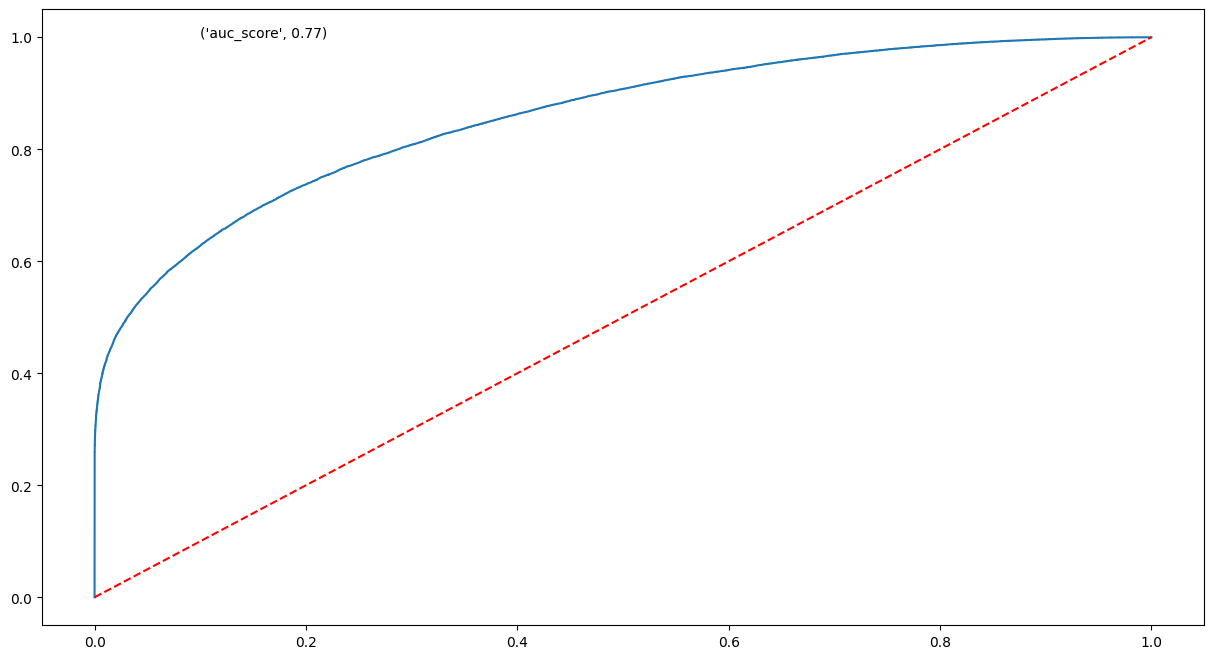

In [ ]:
model_catboost = CatBoostClassifier().fit(xtrain,ytrain)

model_performance(model_catboost , 'Catboost')

In [ ]:
performance_df.style.apply(highlight_row,axis=1)

,Model_Name,Train_Accuracy,Train_F1score,Test_Accuracy,Test_F1score,Precision_Score,Recall_Score,AUC_Score,Remarks
0,Base Model,64.000000,0.570000,65.000000,0.570000,0.720000,0.470000,0.715325,Base
1,Logistic Regression sklearn,50.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.526400,Under Fit
2,DecisionTree Model without tuning,100.000000,1.000000,71.000000,0.710000,0.710000,0.710000,0.711000,Over Fit
3,Random Forest without tuning,100.000000,1.000000,78.000000,0.770000,0.810000,0.730000,0.861200,Over Fit
4,AdaBoost without tuning,72.000000,0.710000,72.000000,0.710000,0.720000,0.700000,0.792900,Good Fit
5,GradientBoosting without tuning,74.000000,0.730000,74.000000,0.730000,0.760000,0.690000,0.821800,Good Fit
6,Neural Network,63.000000,0.550000,64.000000,0.550000,0.720000,0.440000,0.705400,Under Fit
7,Xtreme Gradient Boosting without tuning,78.000000,0.770000,76.000000,0.750000,0.800000,0.700000,0.852500,Good Fit
8,Catboost,79.000000,0.770000,77.000000,0.750000,0.810000,0.700000,0.856300,Good Fit


Train Report :
               precision    recall  f1-score   support

           0       0.72      0.79      0.75    114759
           1       0.77      0.70      0.73    114988

    accuracy                           0.74    229747
   macro avg       0.75      0.74      0.74    229747
weighted avg       0.75      0.74      0.74    229747

Test Report :
               precision    recall  f1-score   support

           0       0.71      0.77      0.74     49346
           1       0.75      0.68      0.71     49117

    accuracy                           0.73     98463
   macro avg       0.73      0.73      0.73     98463
weighted avg       0.73      0.73      0.73     98463



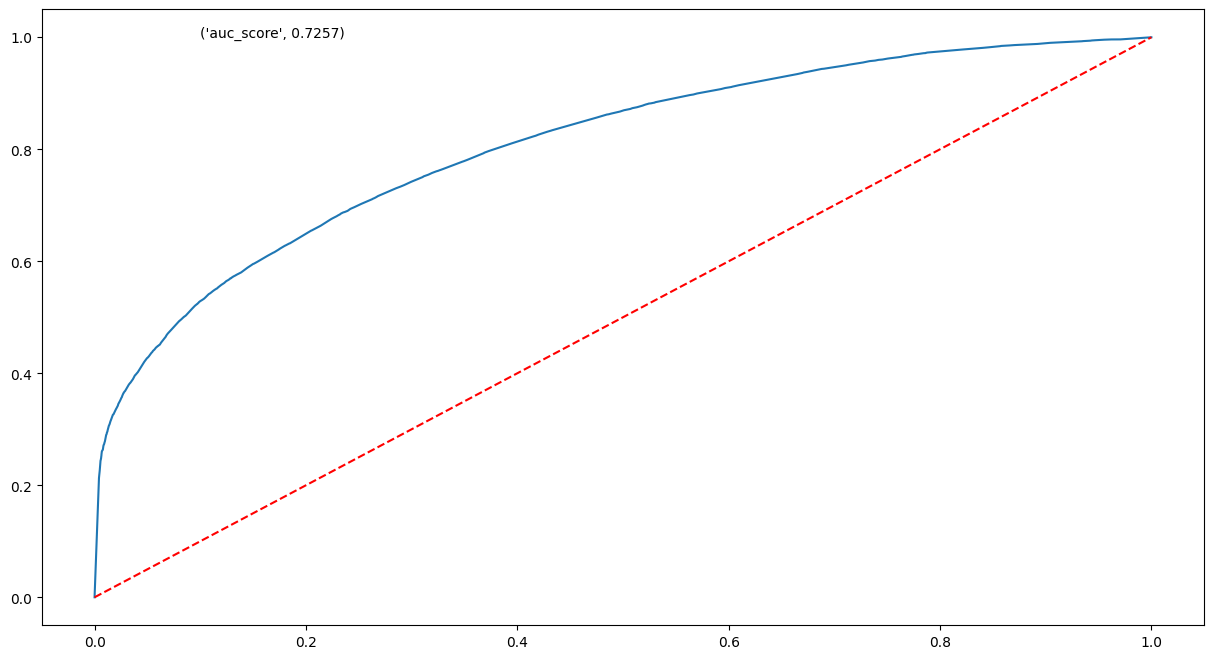

In [ ]:
model_dtp = DecisionTreeClassifier(criterion= 'gini', max_depth= 12, min_samples_split = 8).fit(xtrain,ytrain)

model_performance(model_dtp , 'Decision Tree tuned')

Train Report :
               precision    recall  f1-score   support

           0       0.81      0.90      0.85    114759
           1       0.89      0.79      0.84    114988

    accuracy                           0.85    229747
   macro avg       0.85      0.85      0.85    229747
weighted avg       0.85      0.85      0.85    229747

Test Report :
               precision    recall  f1-score   support

           0       0.75      0.84      0.79     49346
           1       0.82      0.72      0.76     49117

    accuracy                           0.78     98463
   macro avg       0.78      0.78      0.78     98463
weighted avg       0.78      0.78      0.78     98463



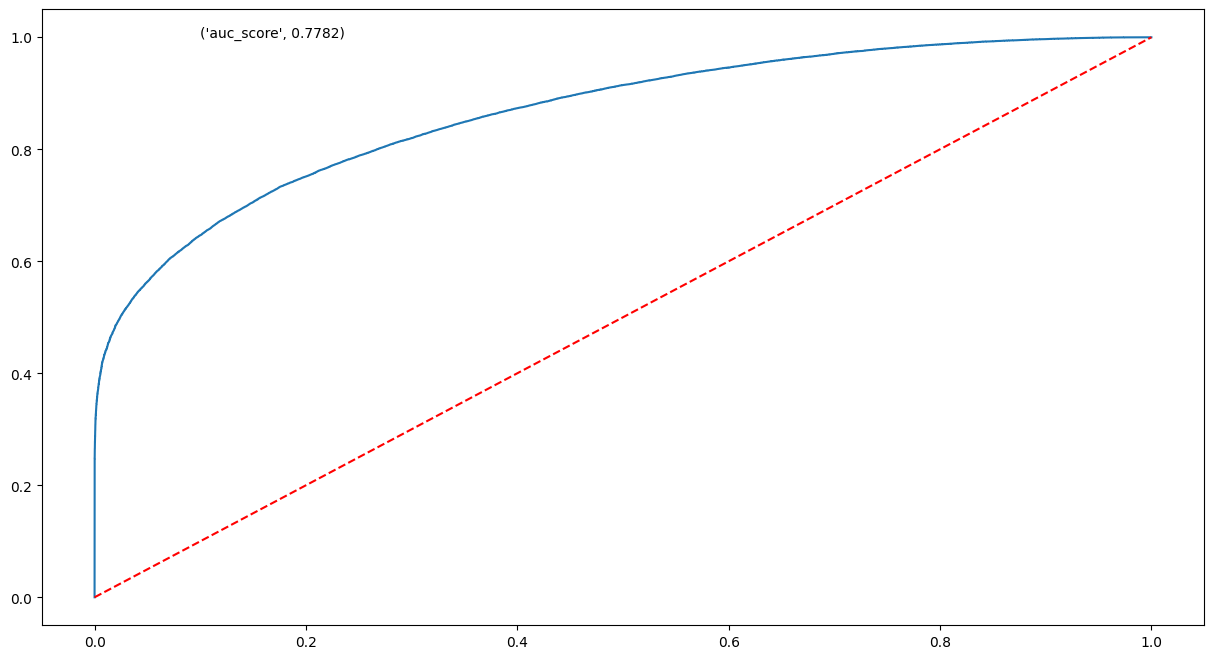

In [ ]:
model_gbp = GradientBoostingClassifier(max_depth = 11, min_samples_split = 6).fit(xtrain,ytrain)

model_performance(model_gbp , 'GradientBoosting Classifier tuned')

Train Report :
               precision    recall  f1-score   support

           0       0.69      0.69      0.69    114759
           1       0.69      0.69      0.69    114988

    accuracy                           0.69    229747
   macro avg       0.69      0.69      0.69    229747
weighted avg       0.69      0.69      0.69    229747

Test Report :
               precision    recall  f1-score   support

           0       0.69      0.69      0.69     49346
           1       0.69      0.69      0.69     49117

    accuracy                           0.69     98463
   macro avg       0.69      0.69      0.69     98463
weighted avg       0.69      0.69      0.69     98463



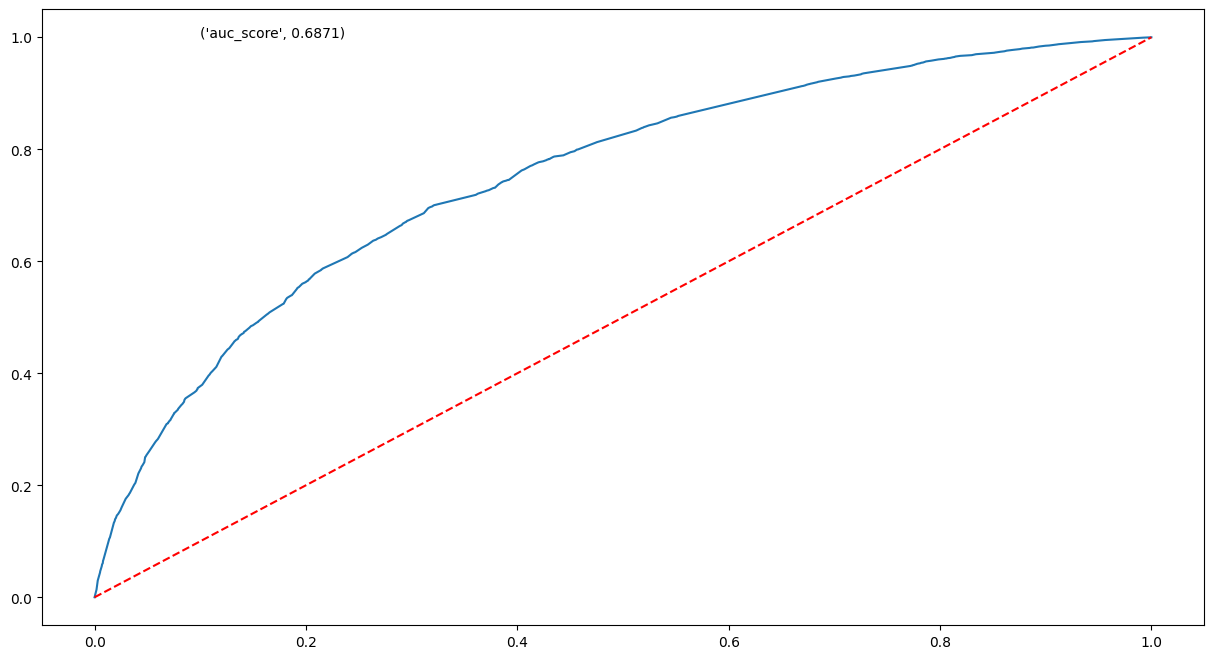

In [ ]:
model_abp = AdaBoostClassifier(learning_rate = 0.1).fit(xtrain,ytrain)

model_performance(model_abp , 'AdaBoost Classifier tuned')

0:	learn: 0.6656975	total: 179ms	remaining: 35.5s
1:	learn: 0.6417089	total: 345ms	remaining: 34.2s
2:	learn: 0.6240781	total: 508ms	remaining: 33.4s
3:	learn: 0.6080374	total: 690ms	remaining: 33.8s
4:	learn: 0.5927335	total: 859ms	remaining: 33.5s
5:	learn: 0.5834549	total: 1.02s	remaining: 33s
6:	learn: 0.5753281	total: 1.18s	remaining: 32.6s
7:	learn: 0.5673994	total: 1.34s	remaining: 32.2s
8:	learn: 0.5619922	total: 1.51s	remaining: 32.1s
9:	learn: 0.5557405	total: 1.69s	remaining: 32.1s
10:	learn: 0.5472483	total: 1.85s	remaining: 31.9s
11:	learn: 0.5432006	total: 2.02s	remaining: 31.7s
12:	learn: 0.5363143	total: 2.19s	remaining: 31.4s
13:	learn: 0.5329638	total: 2.34s	remaining: 31.1s
14:	learn: 0.5292750	total: 2.5s	remaining: 30.9s
15:	learn: 0.5268184	total: 2.67s	remaining: 30.7s
16:	learn: 0.5223129	total: 2.85s	remaining: 30.7s
17:	learn: 0.5201805	total: 3.01s	remaining: 30.4s
18:	learn: 0.5171066	total: 3.17s	remaining: 30.2s
19:	learn: 0.5154755	total: 3.34s	remaining:

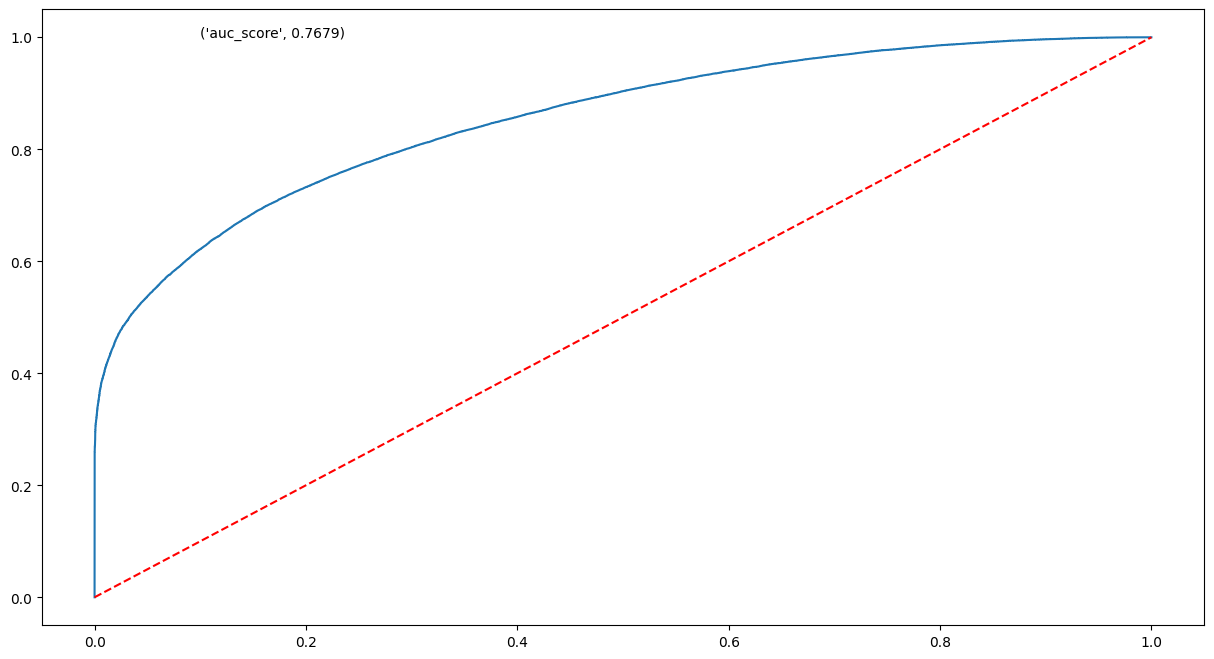

In [ ]:
model_catb = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=10, loss_function='Logloss')
model_catb.fit(xtrain, ytrain)
model_performance(model_catb , 'Cat Boost Tuned')

Train Report :
               precision    recall  f1-score   support

           0       0.72      0.80      0.76    114759
           1       0.78      0.69      0.73    114988

    accuracy                           0.74    229747
   macro avg       0.75      0.74      0.74    229747
weighted avg       0.75      0.74      0.74    229747

Test Report :
               precision    recall  f1-score   support

           0       0.71      0.80      0.75     49346
           1       0.77      0.68      0.72     49117

    accuracy                           0.74     98463
   macro avg       0.74      0.74      0.74     98463
weighted avg       0.74      0.74      0.74     98463



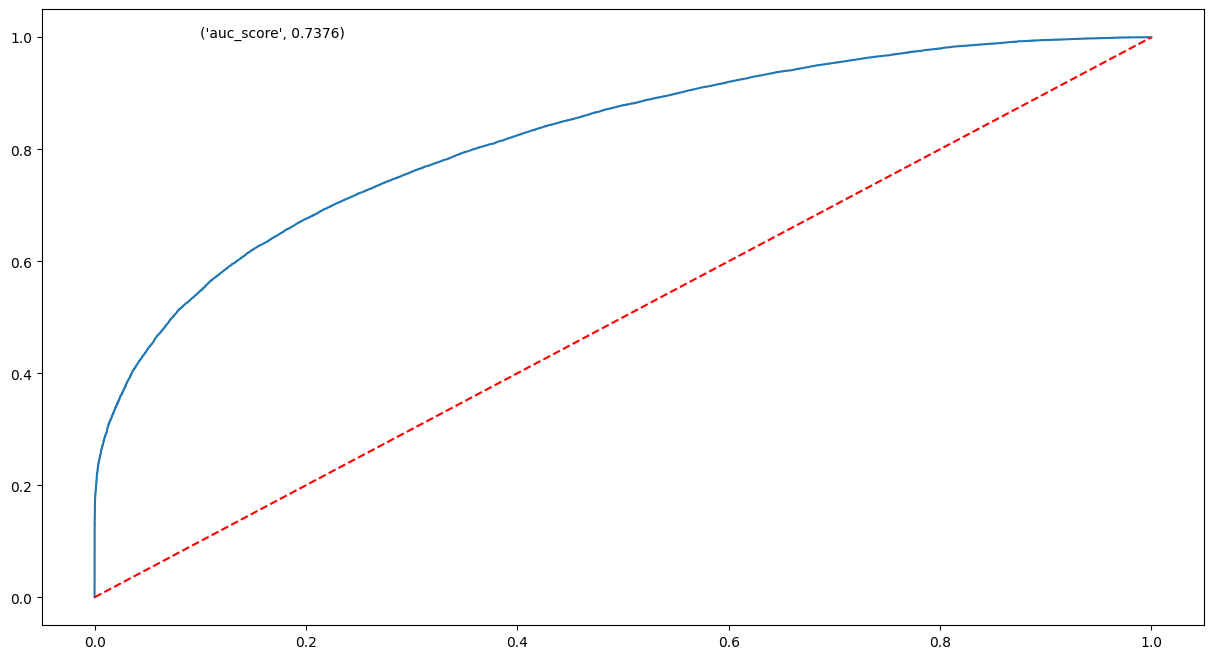

In [ ]:
model_dt_tuned_1 =RandomForestClassifier(criterion = 'entropy',
                                       max_depth = 10,
                                       min_samples_split = 9,
                                         max_features = 16
                                       ).fit(xtrain,ytrain)

model_performance(model_dt_tuned_1,name = 'Random forest Model tuned')

Train Report :
               precision    recall  f1-score   support

           0       0.74      0.83      0.78    114759
           1       0.81      0.71      0.75    114988

    accuracy                           0.77    229747
   macro avg       0.77      0.77      0.77    229747
weighted avg       0.77      0.77      0.77    229747

Test Report :
               precision    recall  f1-score   support

           0       0.73      0.82      0.78     49346
           1       0.80      0.70      0.74     49117

    accuracy                           0.76     98463
   macro avg       0.77      0.76      0.76     98463
weighted avg       0.77      0.76      0.76     98463



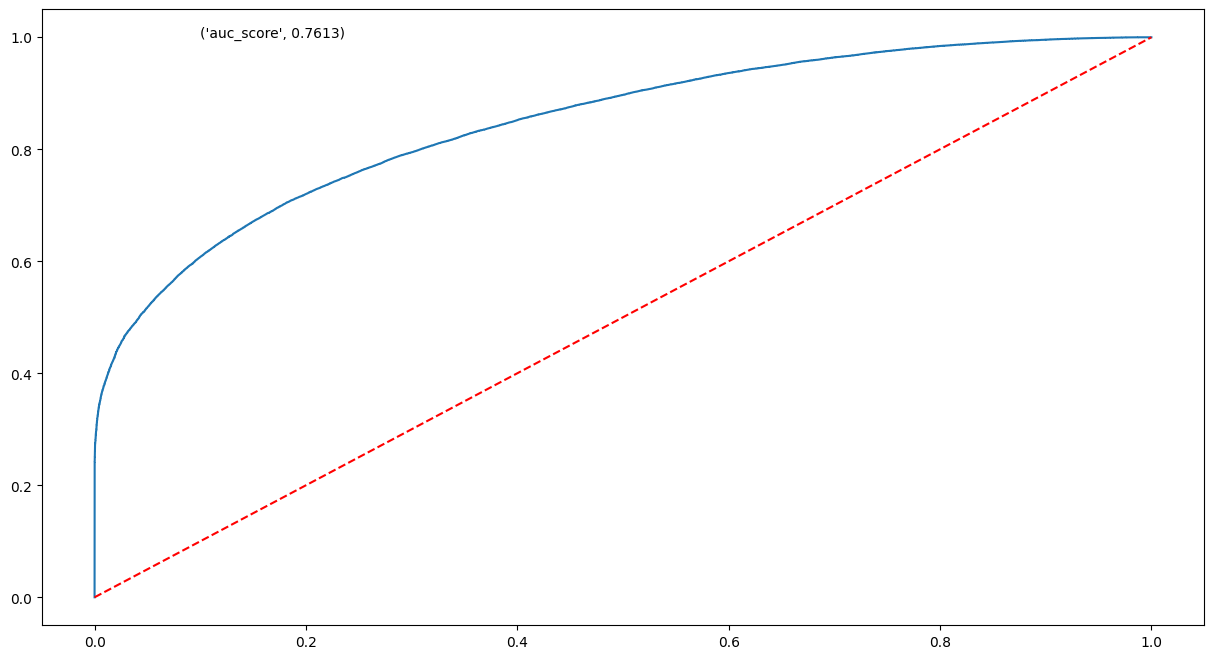

In [ ]:
# XGB with tuning

model_xgbt = XGBClassifier(n_estimators=150,
    learning_rate=0.1,
    random_state=42).fit(xtrain,ytrain)

model_performance(model_xgbt,'Xtreme Gradient Boosting tuned')

In [ ]:
performance_df.style.apply(highlight_row,axis=1)

,Model_Name,Train_Accuracy,Train_F1score,Test_Accuracy,Test_F1score,Precision_Score,Recall_Score,AUC_Score,Remarks
0,Base Model,64.000000,0.570000,65.000000,0.570000,0.720000,0.470000,0.715325,Base
1,Logistic Regression sklearn,50.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.526400,Under Fit
2,DecisionTree Model without tuning,100.000000,1.000000,71.000000,0.710000,0.710000,0.710000,0.711000,Over Fit
3,Random Forest without tuning,100.000000,1.000000,78.000000,0.770000,0.810000,0.730000,0.861200,Over Fit
4,AdaBoost without tuning,72.000000,0.710000,72.000000,0.710000,0.720000,0.700000,0.792900,Good Fit
5,GradientBoosting without tuning,74.000000,0.730000,74.000000,0.730000,0.760000,0.690000,0.821800,Good Fit
6,Neural Network,63.000000,0.550000,64.000000,0.550000,0.720000,0.440000,0.705400,Under Fit
7,Xtreme Gradient Boosting without tuning,78.000000,0.770000,76.000000,0.750000,0.800000,0.700000,0.852500,Good Fit
8,Catboost,79.000000,0.770000,77.000000,0.750000,0.810000,0.700000,0.856300,Good Fit
9,Decision Tree tuned,74.000000,0.730000,73.000000,0.710000,0.750000,0.680000,0.807800,Good Fit


After assessing various models, it was observed that some models exhibited a significant drop in
performance when applied to unseen data, indicating overfitting. However, there were models
that consistently performed well on both training and unseen data. Notably, the **Catboost model**
outperformed other models in terms of performance(79%). Hence, based on its superior performance

In [ ]:
import pickle

In [ ]:
with open('Cat_boost.pkl','wb') as file:
   pickle.dump(model_catboost,file)